This notebook contains the final predictive outputs for my dissertation,and makes up the most important 5% of the work. Please let me know if you would like to see the remaining 95%.

Research Dissertation: https://github.com/PR0VERB/RESEARCH/blob/master/MarchDissertation09.pdf?raw=true

Research paper submitted for publication: 
https://github.com/PR0VERB/RESEARCH/blob/master/MDPI__e_Behaviour__Personality_and_Academic_Performance.pdf?raw=true

Understanding Cohen's Kappa: https://www.knime.com/blog/cohens-kappa-an-overview#:~:text=Cohen's%20kappa%20is%20a%20metric,the%20agreement%20between%20two%20raters.&text=For%20example%2C%20if%20we%20had,their%20agreement%20through%20Cohen's%20kappa

In [1]:
import datetime
import pandas as pd
import numpy as np
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
# import keras
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn import cluster
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

# sns.set_context("talk")
sns.set_style('white') 
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
import statsmodels.formula.api as smf



Using TensorFlow backend.
C:\Users\bseot\anaconda3\envs\education1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\bseot\anaconda3\envs\education1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\bseot\anaconda3\envs\education1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\bseot\anaconda3\envs\ed

In [2]:
# Results on tshela le lesomepedi Diphalane were kudu sampled

In [3]:
# 2019 idnumbers have small letters
# LogDay_1 is a Monday 

In [4]:
# Only 2 classes due to the intuition

In [4]:
person2018 = pd.read_csv('C:/Users/bseot/Documents/2019-MASTERS/MAIN/EDUCATION/MOODLE/MOODLE_2019_EXP/ALGORITHMS/DYNAMIC/NEW/LOGINS/12018LoginsAllfeats_days_binary.csv')
person2019 = pd.read_csv('C:/Users/bseot/Documents/2019-MASTERS/MAIN/EDUCATION/MOODLE/MOODLE_2019_EXP/ALGORITHMS/DYNAMIC/NEW/LOGINS/12019LoginsAllfeats_days_binary.csv')

In [5]:
person2018['AcademicYear'] = 2018
person2018 = person2018.drop(['SemesterFiftyOne'], axis = 1)
person2019['AcademicYear'] = 2019

In [7]:
log_posts_stat_ques = pd.concat([person2018, person2019], axis = 0)

                            OLS Regression Results                            
Dep. Variable:               SemAvg_y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     154.0
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.07e-34
Time:                        22:47:29   Log-Likelihood:                -16567.
No. Observations:                3850   AIC:                         3.314e+04
Df Residuals:                    3848   BIC:                         3.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.7351      1.637     23.050      

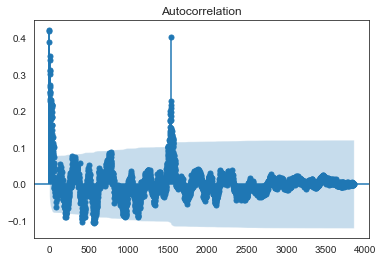

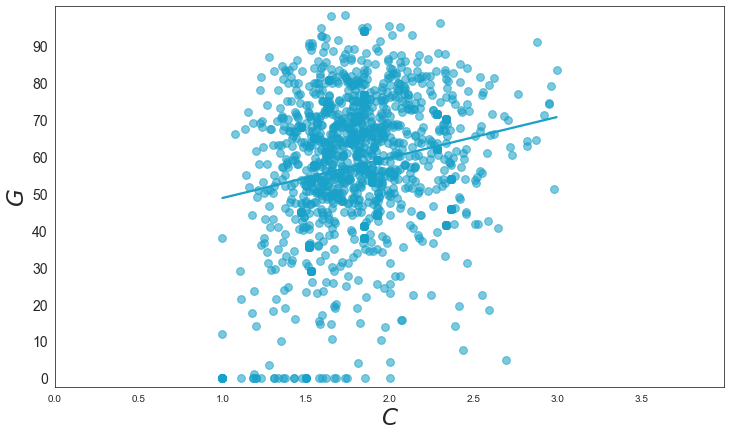

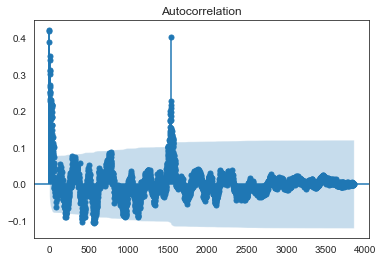

In [8]:
DATA=log_posts_stat_ques.query('(LogAvgTimes>=1) and (LogAvgTimes<=3)')

# OLS Summary
x_, y_ = 'LogAvgTimes', 'SemAvg_y'
# The pvalue reported on was from the Logsum since we don't see it here
mod = smf.ols(formula=f'{y_}~{x_}', data=DATA)
res = mod.fit()
print(res.summary())

# OLS Plot
sns.set_style('white')
ax1, fig = plt.subplots(figsize=(12,7))
ax = sns.regplot(x=x_, y=y_, data=DATA, scatter_kws = {'color': '#1aa1c9', 'alpha':.35, 's':60}, ci=None,line_kws = {'color': '#1aa1c9'})
plt.xlabel('$C$', fontsize=23)
plt.ylabel('$G$', fontsize=23)
# plt.xticks(range(1, 7, 1), fontsize=14)
plt.yticks(range(0,100,10), fontsize=14)
ax.set_xlim(DATA[x_].min()-1, DATA[x_].max()+1)
ax.set_ylim(DATA[y_].min()-2.4, DATA[y_].max()+2.4)
# plt.savefig(fr'{loginPicPath}\logAvgGrade.pdf', dpi=1000, transparent=False)

# Normmality Residual Proof
reg_pred = res.predict(DATA[x_])
resid = DATA[y_] - reg_pred
print(sp.stats.normaltest(resid))

# Residual Acutocorrelation Proof
print('residual autocorrelation:')
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(resid,lags=len(resid)-1, zero = False)



In [9]:
bio_ = pd.read_csv(r'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\DATA\BI_Data_New\BIOGRAPHICAL\Term_Regn_main.csv', error_bad_lines = False, encoding = "ISO-8859-1")


b'Skipping line 1331: expected 177 fields, saw 178\n'
b'Skipping line 4678: expected 177 fields, saw 178\nSkipping line 5071: expected 177 fields, saw 178\nSkipping line 6985: expected 177 fields, saw 178\nSkipping line 6986: expected 177 fields, saw 178\nSkipping line 7705: expected 177 fields, saw 178\nSkipping line 7706: expected 177 fields, saw 178\nSkipping line 8131: expected 177 fields, saw 178\nSkipping line 8132: expected 177 fields, saw 178\n'
b'Skipping line 8358: expected 177 fields, saw 178\nSkipping line 8359: expected 177 fields, saw 178\nSkipping line 8528: expected 177 fields, saw 178\nSkipping line 8529: expected 177 fields, saw 178\nSkipping line 8717: expected 177 fields, saw 178\nSkipping line 8718: expected 177 fields, saw 178\nSkipping line 8872: expected 177 fields, saw 178\nSkipping line 8906: expected 177 fields, saw 178\nSkipping line 9058: expected 177 fields, saw 178\nSkipping line 9059: expected 177 fields, saw 178\nSkipping line 9123: expected 177 fields,

In [10]:
print(pd.Series(list(bio_)).to_latex(caption='CaptionHere', longtable=False, index=True))

\begin{table}
\centering
\caption{CaptionHere}
\begin{tabular}{ll}
\toprule
{} &                               0 \\
\midrule
0   &             STUDENT\_ENCRYPT\_KEY \\
1   &                     GENDER\_CODE \\
2   &                    ST\_RACE\_CODE \\
3   &                    ENROLLED\_AGE \\
4   &                     HP\_PROVINCE \\
5   &                         HP\_CITY \\
6   &                 HP\_ST\_POST\_CODE \\
7   &                    PROGRAM\_CODE \\
8   &                   PROGRAM\_TITLE \\
9   &                     PROGRAM\_CAT \\
10  &               PROGRAM\_TYPE\_DESC \\
11  &                    PROGRAM\_TYPE \\
12  &            ALIGNED\_PROGRAM\_CODE \\
13  &          CREDIT\_POINTS\_REQUIRED \\
14  &                    FACULTY\_NAME \\
15  &                            AREA \\
16  &              CALENDAR\_INST\_YEAR \\
17  &                      NEW\_RETURN \\
18  &                   SPECIAL\_GROUP \\
19  &                             YOS \\
20  &              ATTENDANCE

In [11]:
len(set(person2018.idnumber).intersection(set(bio_.STUDENT_ENCRYPT_KEY.unique())))

390

In [12]:
log_posts_stat_ques['SemesterFiftyOne'] = np.where(log_posts_stat_ques['SemAvg_y'] >= 51, 1, 0)
log_posts_stat_ques = log_posts_stat_ques.dropna(subset = ['SemesterFiftyOne'])


In [13]:
logDay_orderedid = log_posts_stat_ques.filter(regex = ('idnumber|[LogDay_]\d')).fillna(0)
logDay_ordered= log_posts_stat_ques.filter(regex = ('[LogDay_]\d')).fillna(0)
order = np.array(logDay_ordered.columns.str.replace("[LogDay_]", ""), dtype = int)
order.sort()
order = order.astype(str)
append_str = 'LogDay_'
order = [append_str + num for num in order] 

logDay_ordered = logDay_ordered[order]
logDay_ordered['idnumber'] = logDay_orderedid['idnumber']
# order = [append_str + num for num in order] 
log_posts_stat_ques = log_posts_stat_ques.drop(log_posts_stat_ques.filter(regex = ('LogDay_')).columns, axis = 1)
log_posts_stat_ques = log_posts_stat_ques.merge(logDay_ordered, on = 'idnumber', how = 'left')
log_posts_stat_ques = log_posts_stat_ques.drop_duplicates(subset = ['idnumber', 'YOS', 'YearAvg', 'LogRegPreds'])

In [14]:
# Send to `http://localhost:8888/notebooks/Documents/2019-MASTERS/MAIN/EDUCATION/MOODLE/MOODLE_2019_EXP/ALGORITHMS/DYNAMIC/2019_COMS/NEW/LOGINS/11819MLLogins123MeanRELATIVE49RFE-Copy1.ipynb#`

In [15]:
log_posts_stat_ques.to_csv('C:/Users/bseot/Documents/2019-MASTERS/MAIN/EDUCATION/MOODLE/MOODLE_2019_EXP/ALGORITHMS/DYNAMIC/NEW/LOGINS/11819LoginsAllfeats_days_binary.csv')

In [16]:
len(log_posts_stat_ques)

1133

In [17]:
# transform the procrastination and conscientiousness columns... we don't want to oversample

In [18]:
## conscientiousness

In [19]:
log_posts_stat_ques['Conscientiousness1'] = log_posts_stat_ques['LogAutocorrPearson6']*log_posts_stat_ques['LogAvgDays']**4

In [20]:
## Extraversion 

In [21]:
log_posts_stat_ques['StatePlusQuest'] = (log_posts_stat_ques['StatementsNo_x'] + log_posts_stat_ques['QuestionsNo_x'])
log_posts_stat_ques['StatePlusQuestTimesPosts'] = (log_posts_stat_ques['StatementsNo_x'] + log_posts_stat_ques['QuestionsNo_x'])*log_posts_stat_ques['PostAvgHalf']

In [22]:
## procrastination 

In [23]:
log_posts_stat_ques['SubAvgSecondsBefore'] = log_posts_stat_ques['SubAvgSecondsBefore_y']/60/60/24
log_posts_stat_ques['SubAvgSecondsBefore'] = log_posts_stat_ques['SubAvgSecondsBefore']*-1

In [24]:
log_posts_stat_ques = log_posts_stat_ques.rename(columns = {'StatePlusQuest': 'Extraversion1','SubAvgSecondsBefore': 'Procrastination1'})

In [25]:
from sklearn.preprocessing import MinMaxScaler as MMS
from pandas.api.types import is_numeric_dtype
log_posts_stat_ques[['Conscientiousness1','Extraversion1','Procrastination1', 'YOS']] = MMS().fit_transform(log_posts_stat_ques[['Conscientiousness','Extraversion','Procrastination', 'YOS']])


In [26]:
## LSTM on weekly logins -- must first summarise by week

In [27]:
logs_id = log_posts_stat_ques.filter(regex = ('idnumber|LogDay'))

In [28]:
## LSTM on weekly logins -- transpose logs_id then add time column to summarise by week

In [29]:
logs_id = logs_id.unstack().unstack()
logs_id.columns = logs_id.iloc[0,:]
logs_id = logs_id.drop('idnumber')

start_date = datetime.date(2018, 2, 4)
numdays = 208
date_list = [start_date + datetime.timedelta(days=x) for x in range(numdays)]
logs_id.index = date_list
logs_id.index = pd.to_datetime(logs_id.index)
logs_id = logs_id.loc[:,~logs_id.columns.duplicated()]

In [30]:
## Drop duplicate rows and then then resample by week. remember the weeks aren't actual; they're not real when they get to somewhere mid-year. Only created so that we can resample by weekly behaviours.

## Then unstack()

In [31]:
logs_id = logs_id.resample('W').sum()
logs_id = logs_id.unstack().unstack()

In [32]:
## Merge with grades that are not 0

In [33]:
logs_id.columns = range(len(logs_id.columns.values))
features = logs_id.columns
features = features.to_list()


In [34]:
log_posts_stat_ques2 = log_posts_stat_ques.drop_duplicates('idnumber')
log_posts_stat_ques2 = log_posts_stat_ques2[log_posts_stat_ques2['SemAvg_y'] != 0.0]
logs_id_nozeros = logs_id.merge(log_posts_stat_ques2[['idnumber','SemesterFiftyOne', 'SemAvg_y']], on= 'idnumber', how = 'right')


In [35]:
## LSTM; Can also add background or any other static information. Check 0LSTMModel file in this directory `http://localhost:8888/notebooks/Documents/2019-MASTERS/MAIN/EDUCATION/MOODLE/MOODLE_2019_EXP/ALGORITHMS/DYNAMIC/NEW/LOGINS`

In [36]:
# Time Series

In [37]:
# With static features

In [38]:
logs_id_pers = logs_id.merge(log_posts_stat_ques[['idnumber', 'LogStdErrGrad', 'Procrastination1', 'LogSlope', 'LogRvalue', 'YOS', 'SemesterFiftyOne', 'SemAvg_y']], on = 'idnumber', how = 'left')

In [39]:
logs_id_pers[['LogStdErrGrad', 'Procrastination1', 'LogSlope', 'LogRvalue', 'YOS']] = logs_id_pers[['LogStdErrGrad', 'Procrastination1', 'LogSlope', 'LogRvalue', 'YOS']]*100

In [40]:
## Cut the data into `0,40,60,100`

In [41]:
# https://www.journaldev.com/33394/pandas-cut-function-examples
BINS = [-1, 50,100]
logs_id_pers['SemesterFortySixty'] = pd.cut(x=logs_id_pers['SemAvg_y'], bins=BINS, labels = [0,1], right = True)#upper and including, lower and excluding



In [42]:
## `end of wanting the ugly dtree features`

In [43]:
before_after = 'n'#input('features_and_static END of the time series? (y/n)')
what_features = '2'#input("dtree features (1) or ['LogStdErrGrad', 'Procrastination1', 'LogSlope', 'LogRvalue', 'YOS'] (2)")
if what_features == '1':
    features_and_static = dtree_features
if what_features == '2':
#     features_and_static = ['LogStdErrGrad', 'Procrastination1', 'LogSlope', 'LogRvalue', 'YOS']
    features_and_static = []


if before_after == 'y':
    print(f'{features_and_static} going in at the end of the time series')
    for feat in features_and_static:
        features.append(feat)
        features_and_static = features

        
if before_after == 'n':
    print(f'{features_and_static} going in at the beginning of the time series')
    for feat in features:
        features_and_static.append(feat)


[] going in at the beginning of the time series


In [44]:
# Train lstm on the time series 0-30 to predict failures vs passes. then feed these predictions (as a continuous feature)  
# into dec tree.
# This new feature may tell us what pattern exists in the student's login behaviour.
# Train-test must remains the same for both models

In [45]:
## Reserve the `testEnd` (y and X) for validation at the end, so we don't train on those samples

In [46]:
# labl_in = input('SemesterFiftyOne (1) or SemesterFortySixty (2)?')
labl_in = '1'

if labl_in == '1':
    labl = 'SemesterFiftyOne'
elif labl_in == '2':
    labl = 'SemesterFortySixty'
else:
    raise Exception("Select a valid label")
logs_id_pers[labl] = logs_id_pers[labl].astype(int)


In [47]:
# <span style = 'color:LIME'> This is where we create PREDICTION series
    

In [48]:
### Do not change the below

In [49]:
train_, testEnd = train_test_split(logs_id_pers, random_state = 0, test_size = .15, stratify = logs_id_pers[labl])

In [50]:
#     next time save the model name
createNewOrExisting = 'e'
if createNewOrExisting == 'e':
    
    # load model
    LSTM_11819 = load_model('23-11-2020_21-21LSTMSemesterFiftyOne.h5')
    # summarize model.
    print(LSTM_11819.summary())
# elif createNewOrExisting == 'n':



#     train = train_
#     if labl != 'SemesterFiftyOne':
#         sys.exit();

#     a = train[train[labl] == 0]
#     train = pd.concat([train,a,a,a], axis = 0) #3 a's is 86a's plus 86+86+86 (so 86x4)


#     # X_cols_arr is an array of arrays with the features (from 0 to 'YOS') 
#     X_cols = list(train[features_and_static])
#     X_cols_arr = []
#     for col_num, col_name in enumerate(X_cols):
#         cumulative_cols = X_cols[col_num]
#         X_cols_arr.append(cumulative_cols)

#     preds = []
#     for i, cols in enumerate(X_cols_arr):
#         print(cols)
#         # want_cols is the iterable that increases in size between 0 and the last column
#         want_cols = X_cols_arr[:i+1]
#         train_dynamic = train.fillna(0)
#         train_dynamic = train[want_cols]

#         testEnd_dynamic = testEnd.fillna(0)
#         testEnd_dynamic = testEnd[want_cols]


#         # sgd = SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")


#         X_train = train_dynamic
#         y_train = train[[labl]]

#         X_testEnd = testEnd_dynamic
#         y_testEnd = testEnd[[labl]]


#         X_train_ = np.array(X_train.fillna(0))
#         y_train_ = np.array(y_train)
#         X_testEnd_ = np.array(X_testEnd.fillna(0))
#         y_testEnd_ = np.array(y_testEnd)

#         # #reshape to make 3 dimensions
#         X_train_ = np.reshape(X_train_, (X_train_.shape[0], 1, X_train_.shape[1]))
#         X_testEnd_ = np.reshape(X_testEnd_, (X_testEnd_.shape[0], 1, X_testEnd_.shape[1]))

#         # DEFINE MODEL
#         UNITS = 550
#         EPOCHS = 500
#     #     UNITS = 1
#     #     EPOCHS = 1
#         VALIDATION_SPLIT = .3
#         BATCH_SIZE=15 #32 is standard
#         STATE = 97
#         adam = Adam(lr=1e-4, decay = 0)
#         OPT = adam
#         LOSS = 'binary_crossentropy'
#         ACTIVATION = 'sigmoid'

#         model = Sequential()
#         model.add(LSTM(units = UNITS, input_shape=(1, X_train_.shape[2])))
#         model.add(Dense(1, activation=ACTIVATION))
#         model.summary()
#         model.compile(loss=LOSS, optimizer=OPT, metrics=['accuracy'])
#         model.fit(X_train_, y_train_, epochs=EPOCHS, batch_size=BATCH_SIZE,validation_split = VALIDATION_SPLIT, steps_per_epoch = None)
#         # LSTM RESULTS; we do not test anything here; X_testEnd_ is tested at the bottom
#         lstm_pred = model.predict(X_testEnd_)
#         preds.append(lstm_pred.tolist())

#     preds_df_ = pd.DataFrame(preds)
#     preds_df = preds_df_.apply(lambda x: x.astype(str).str.replace('[','').str.replace(']','').astype(float)).transpose()
#     preds_df.index = testEnd['idnumber']

#     LSTM_11819 = model
#     lstm_time_model_name = f'{datetime.datetime.now().strftime("%d-%m-%Y_%H-%M")}ts_30x1_LSTM{labl}.h5'
#     LSTM_11819.save(lstm_time_model_name)
#     print("Saved model to disk")
#     lstm_time_model_name

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 550)               1291400   
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 551       
Total params: 1,291,951
Trainable params: 1,291,951
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
## is the lstm training in the same way as before? try all the features as did before

In [52]:
labl = 'SemesterFiftyOne'

In [53]:
preds_df = pd.read_csv('lstmPreds170x41-11819LSTM_23-11-2020_21-21.csv')

In [54]:
preds_df = preds_df.set_index('Unnamed: 0',drop = True)

In [55]:
testEndResults = pd.read_csv('lstmtestEndResults170x41-11819LSTM_23-11-2020_21-21.csv')

In [56]:
testEndResults = testEndResults.set_index('Unnamed: 0',drop = True)

In [57]:
# testEndResults = testEnd.copy()
# LSTMPredictionYOS is the last prediction in the preds_df
# testEndResults['LSTMPrediction21'] = preds_df['21'].values.round().astype(int)
preds_df['LSTMPredictionLogStdErrGrad'] = np.where(preds_df['LogStdErrGrad']>=0.5,1,0)
testEndResults['LSTMPredictionLogStdErrGrad'] = preds_df['LSTMPredictionLogStdErrGrad']
preds_df['LSTMPredictionProcrastination1'] = np.where(preds_df['Procrastination1']>=0.5,1,0)
testEndResults['LSTMPredictionProcrastination1'] = preds_df['LSTMPredictionProcrastination1']

In [58]:
# SemAvgY = testEndResults['SemAvg_y']
# testEndResults = testEndResults.drop('SemAvg_y', axis = 1)
# testEndResults.insert(loc=37, column = 'SemAvg_y', value = SemAvgY, allow_duplicates = False)
# testEndResults = testEndResults.drop('SemesterFortySixty', axis = 1)

In [59]:
testEndResults['ConfusionMatrix'] = 'True Safe'
testEndResults['ConfusionMatrix'] = np.where(((testEndResults['LSTMPredictionYOS'] == 0) &\
                                              (testEndResults['SemesterFiftyOne'] == 0)), 'True Flag',\
                                             testEndResults['ConfusionMatrix'])

testEndResults['ConfusionMatrix'] = np.where(((testEndResults['LSTMPredictionYOS'] == 0) &\
                                              (testEndResults['SemesterFiftyOne'] == 1)), 'False Flag',\
                                             testEndResults['ConfusionMatrix'])

testEndResults['ConfusionMatrix'] = np.where(((testEndResults['LSTMPredictionYOS'] == 1) &\
                                              (testEndResults['SemesterFiftyOne'] == 0)), 'False Safe',\
                                             testEndResults['ConfusionMatrix'])

In [60]:
# # testEndResults = pd.read_csv('lstmtestEndResults170/x42-11819LSTM_22-11-2020_12-12.csv')
# testEndResults['SemAvg_y'] = testEndResults['SemAvg_y']/100

In [61]:
# preds_df['LSTMPrediction21'] = testEndResults['LSTMPrediction21'].values
preds_df['LSTMPredictionYOS'] = testEndResults['LSTMPredictionYOS'].values
preds_df['ConfusionMatrix'] = testEndResults['ConfusionMatrix'].values
preds_df['SemAvg_y'] = testEndResults['SemAvg_y'].values
preds_df['SemesterFiftyOne'] = testEndResults['SemesterFiftyOne'].values



In [62]:
# preds_df['idnumber'] = testEndResults['idnumber']

In [63]:
## rename the colums 31 to 35 in `preds_df ` to the appropriate dtree features instead of `31,...,35`

In [64]:
# col_dict = res = {list(preds_df.iloc[:, 31:36])[i]: list(testEndResults.iloc[:, 32:37])[i] for i in range(len(list(preds_df.iloc[:, 31:36])))} 
# preds_df = preds_df.rename(columns = col_dict)

In [65]:
## Take `testEndResults` to_csv 

In [66]:
# testEndResults.to_csv(f'lstmtestEndResults{testEndResults.shape[0]}x{testEndResults.shape[1]}-11819LSTM_{datetime.datetime.now().strftime("%d-%m-%Y_%H-%M")}.csv',\
#                 index = True) # index true because we still want the index

In [67]:
## Make `preds_df` to_csv only after appending the results to them

In [68]:
# preds_df.to_csv(f'lstmPreds{preds_df.shape[0]}x{preds_df.shape[1]}-11819LSTM_{datetime.datetime.now().strftime("%d-%m-%Y_%H-%M")}.csv',\
#                 index = True) # index true because we still want the index

In [69]:
## Rearrange columns of `preds_df` so we have `SemAvg_y` in the prediction as well

In [70]:
preds_df = preds_df[list(testEndResults)]

In [71]:
falseSafes = testEndResults[testEndResults['ConfusionMatrix'] == 'False Safe'].sort_values(by = 'SemAvg_y', ascending = False)
falseSafesPreds = preds_df.loc[preds_df['idnumber'].isin(falseSafes['idnumber'])].sort_values(by = 'SemAvg_y', ascending = False)
falseFlags = testEndResults[testEndResults['ConfusionMatrix'] == 'False Flag'].sort_values(by = 'SemAvg_y', ascending = False)
falseFlagsPreds = preds_df.loc[preds_df['idnumber'].isin(falseFlags['idnumber'])].sort_values(by = 'SemAvg_y', ascending = False)


In [72]:
len(falseFlags)

12

In [73]:
trueSafes = testEndResults[testEndResults['ConfusionMatrix'] == 'True Safe'].sort_values(by = 'SemAvg_y', ascending = False)
trueFlags = testEndResults[testEndResults['ConfusionMatrix'] == 'True Flag'].sort_values(by = 'SemAvg_y', ascending = False)



# Results:

In [74]:
lstm_actual = testEndResults['SemesterFiftyOne']
lstm_pred2 = preds_df['23'].round()
coheezy = cohen_kappa_score(lstm_actual, lstm_pred2)
mat_lstm = confusion_matrix(lstm_actual, lstm_pred2)
class_report_lstm = classification_report(lstm_actual, lstm_pred2)
print(f'Cohen\'s Kappa: {coheezy}')
print(mat_lstm)
print(class_report_lstm)

print('THE IMPORTANCE OF YOS IS SHOWN IN THE RESULT OF THE LSTM PREDICTION UP TO yos')
lstm_actual = testEndResults['SemesterFiftyOne']
lstm_pred2 = testEndResults['LSTMPredictionYOS'] 
coheezy = cohen_kappa_score(lstm_actual, lstm_pred2)
mat_lstm = confusion_matrix(lstm_actual, lstm_pred2)
class_report_lstm = classification_report(lstm_actual, lstm_pred2)
print(f'Cohen\'s Kappa: {coheezy}')
print(mat_lstm)
print(class_report_lstm)

# preds = []
# lstm_pred = 
# preds.append(lstm_pred.tolist())

# preds_df = pd.DataFrame(preds)
# preds_df = preds_df.apply(lambda x: x.astype(str).str.replace('[','').str.replace(']','').astype(float)).transpose()
# preds_df.index = testEnd['idnumber']

Cohen's Kappa: 0.32088700472851783
[[27 19]
 [30 94]]
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        46
           1       0.83      0.76      0.79       124

    accuracy                           0.71       170
   macro avg       0.65      0.67      0.66       170
weighted avg       0.73      0.71      0.72       170

THE IMPORTANCE OF YOS IS SHOWN IN THE RESULT OF THE LSTM PREDICTION UP TO yos
Cohen's Kappa: 0.5148223163321672
[[ 27  19]
 [ 12 112]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.64        46
           1       0.85      0.90      0.88       124

    accuracy                           0.82       170
   macro avg       0.77      0.75      0.76       170
weighted avg       0.81      0.82      0.81       170



## Time Series of the Kappa Scores

In [75]:
weks = list(preds_df.loc[:,'0':'30'])
kaps = []
for wk in weks:
    lstm_actual = testEndResults['SemesterFiftyOne']
    lstm_pred2 = preds_df[wk].round()
    coheezy = cohen_kappa_score(lstm_actual, lstm_pred2)
    kaps.append(coheezy)
kaps = pd.DataFrame(kaps, columns = ['Kappa'])
wantWeeks = np.array([0,3,4,5,6,8,10,12,16,18,19,20,21,22,23,24,25,26,28,29,30])
kaps = kaps.iloc[wantWeeks]

In [76]:
kaps.index = range(1,22)
kaps['DeltaKappa'] = kaps['Kappa'].diff()
kaps['DeltaKappaOverZero'] = np.where(kaps['DeltaKappa']>0, 'blue', 'red')
# kaps['Time'] = kaps.index
# kaps['KappaOverTime'] = kaps['Kappa']/kaps['Time']

In [77]:
loginPicPath = fr'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\WRITING\FIGURES\FINAL\ANALYSIS\LOGINS'

In [78]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"
DATA = kaps
DATA.index = range(1,22)
fig = px.line(DATA, x=DATA.index, y="Kappa",
            labels={
                     "Kappa": "k(t)",
                     "index": "t", 
#                      'size':'10',
                    }
                )
fig.update_layout(
    xaxis = dict(
            tickvals = DATA.index,
#         xlabelfont = {'color':"black", 'size':20}
#             size=18,
    ),
    font=dict(
#         family="Courier New, monospace",
        size=16,
        color="black"
    )
)
# fig.update_layout(
#     title="Plot Title",
#     xaxis_title="x Axis Title",
#     yaxis_title="y Axis Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=20,
#         color="#7f7f7f"
#     )
# )
fig.show()
fig.write_image(fr'{loginPicPath}\kappachanges.pdf', engine = 'kaleido')

In [79]:
# kaps['DeltaKappaOverTime'] = kaps['DeltaKappa']/kaps['Time']

In [80]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"
DATA = kaps
DATA.index = range(1,22)
fig = px.line(DATA, x=DATA.index, y="DeltaKappa",
            labels={
                     "Kappa": "$\kappa(w)$",
                     "index": "$w$", 
                
#                 'size':30,
                    }
              
                )
fig.update_layout(
    xaxis = dict(
#         tickmode = 'linear',
        tickvals = DATA.index,

#         dtick = 1
    ))

fig.show()

In [81]:
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

fig = go.Figure(go.Waterfall(
    x = [["2016", "2017", "2017", "2017", "2017", "2018", "2018", "2018", "2018"],
       ["initial", "q1", "q2", "q3", "total", "q1", "q2", "q3", "total"]],
    measure = ["absolute", "relative", "relative", "relative", "total", "relative", "relative", "relative", "total"],
    y = [10, 20, 30, -10, None, 10, 20, -40, None], base = 300,
    decreasing = {"marker":{"color":"Maroon", "line":{"color":"red", "width":2}}},
    increasing = {"marker":{"color":"Teal"}},
    totals = {"marker":{"color":"deep sky blue", "line":{"color":"blue", "width":3}}}
))

fig.update_layout(title = "Profit and loss statement", waterfallgap = 0.3)

fig.show()

In [82]:
import plotly.graph_objects as go
pio.templates.default = "simple_white"

measure = ['relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative','relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'total']
fig = go.Figure(go.Waterfall(
    x = kaps.index,
    measure = measure,
    y = kaps['DeltaKappa'], base = 0,
    decreasing = {"marker":{"color":"red", "line":{"color":"magenta", "width":1}}},
    increasing = {"marker":{"color":"#008bfc", "line":{"color":"cyan", "width":1}}},
    totals = {"marker":{"color":"silver", "line":{"color":"silver", "width":3}}},
#     width=800, height=400
))

fig.update_layout(title = "", waterfallgap = 0.15, width=900, height=650, xaxis = dict(tickvals = kaps.index), 
                  xaxis_title="t",
                    yaxis_title="k(t)", font=dict(size=20, color="black")
)
 
fig.write_image(fr'{loginPicPath}\kappawaterfall.pdf', engine = 'kaleido')

fig.show()


In [83]:
a = (['relative']*20)
a.append('d')

In [84]:
b=a

In [85]:
## Examine the distributions for the classification groups
DATA = preds_df.copy()
DATA['SemAvg_y'] = DATA['SemAvg_y']*100
DATA.replace(inplace = True,to_replace = {'True Safe': 'Ignored & Safe', 'False Safe': 'Ignored but At-risk', 'True Flag': 'Flagged & At-risk', 'False Flag': 'Flagged but Safe'})

In [86]:
DATA.query('ConfusionMatrix=="Flagged but Safe"').sort_values(ascending=False, by='SemAvg_y')

idnumber         0         1         2  \
Unnamed: 0                                                                   
74          34BADE31EAD5465240690C52965DA4ED  0.570794  0.566231  0.537745   
661         2ecdfec96aabf5470be7d07745ebdbc0  0.570794  0.579937  0.575951   
1128        5c374965dbe5d040ff8e7c681ba5d0b1  0.570794  0.575693  0.607127   
629         018791f61c1b9f996fe70a1836d5f0f5  0.570794  0.575693  0.588547   
385         F6FF6917C9012178DA6582739E7C8E5F  0.570794  0.566231  0.537745   
40          2152CC655EA0F817ED7A7B42461CF3A8  0.570794  0.566231  0.537745   
708         072cd8fe0ff2f36182eb24541a4155f4  0.570794  0.575693  0.565340   
404         b50803b01988eb470889d2ca20587b99  0.570794  0.579063  0.579086   
151         611B9BDA688B7C1F9EEB7115FCE619F3  0.570794  0.566231  0.537745   
181         7594DB2D29E7391BDF92A15BF19C7303  0.570794  0.566231  0.537745   
1065        ec764746c08208708c8c05a69578427b  0.570794  0.579063  0.538353   
1125        538ad4510f78b36aebd6353f5a3e6ad1  0.570794  0.575693  0.610037   

                   3         4         5         6         7         8  ...  \
Unnamed: 0                                                              ...   
74          0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
661         0.547630  0.603880  0.531472  0.538379  0.613225  0.651168  ...   
1128        0.540808  0.698698  0.678575  0.582170  0.543971  0.640430  ...   
629         0.602901  0.651681  0.572612  0.610752  0.558590  0.436193  ...   
385         0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
40          0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
708         0.567849  0.559013  0.732327  0.772524  0.814898  0.810281  ...   
404         0.608940  0.642009  0.632374  0.638924  0.539683  0.525749  ...   
151         0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
181         0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
1065        0.548640  0.544545  0.494111  0.348835  0.454472  0.342112  ...   
1125        0.610498  0.557878  0.516149  0.574220  0.544180  0.606698  ...   

            Procrastination1  LogSlope  LogRvalue       YOS  SemAvg_y  \
Unnamed: 0                                                              
74                  0.878367  0.810049   0.838863  0.383052    85.000   
661                 0.417508  0.090522   0.450045  0.488663    74.500   
1128                0.464837  0.432862   0.042260  0.000024    71.000   
629                 0.499011  0.545509   0.018432  0.042794    70.750   
385                 0.120411  0.222192   0.057180  0.047623    67.000   
40                  0.870947  0.890847   0.004873  0.000055    67.000   
708                 0.001254  0.000403   0.009870  0.073156    64.500   
404                 0.016668  0.029185   0.199829  0.108638    63.250   
151                 0.120963  0.148134   0.098451  0.127984    59.000   
181                 0.116320  0.198637   0.275384  0.302850    54.000   
1065                0.550184  0.548985   0.253725  0.115810    52.375   
1125                0.552650  0.580625   0.555377  0.025550    51.750   

            SemesterFiftyOne  LSTMPredictionYOS   ConfusionMatrix  \
Unnamed: 0                                                          
74                         1                  0  Flagged but Safe   
661                        1                  0  Flagged but Safe   
1128                       1                  0  Flagged but Safe   
629                        1                  0  Flagged but Safe   
385                        1                  0  Flagged but Safe   
40                         1                  0  Flagged but Safe   
708                        1                  0  Flagged but Safe   
404                        1                  0  Flagged but Safe   
151                        1                  0  Flagged but Safe   
181                        1                  0  Flagg

In [87]:
loginPicPath = r'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\WRITING\FIGURES\FINAL\ANALYSIS\LOGINS'
sns.set_style('white')


C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



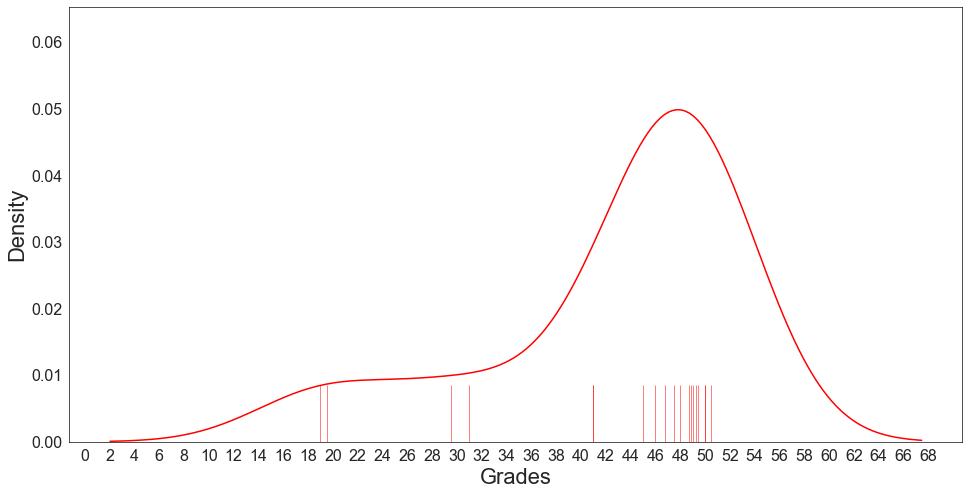

In [88]:
fig,ax=plt.subplots(figsize=(16,8))
here = DATA.query('ConfusionMatrix=="Ignored but At-risk"')
sns.set_style('white')

sns.distplot(here.SemAvg_y, rug=True, bins = 10, color = 'red', rug_kws={"color": "red", "alpha": 1., "linewidth": .5, "height":0.13},hist=False)
sns.set_style('white')

plt.xticks(range(0,70,2),fontsize=16)
plt.xlabel('Grades', fontsize=22)
plt.ylabel('Density', fontsize=22)
plt.yticks(fontsize=16)
ax.grid(False)
# plt.tight_layout()
plt.savefig(fr'{loginPicPath}\YOSIgnoredRisk.pdf', dpi=100, transparent=False) 

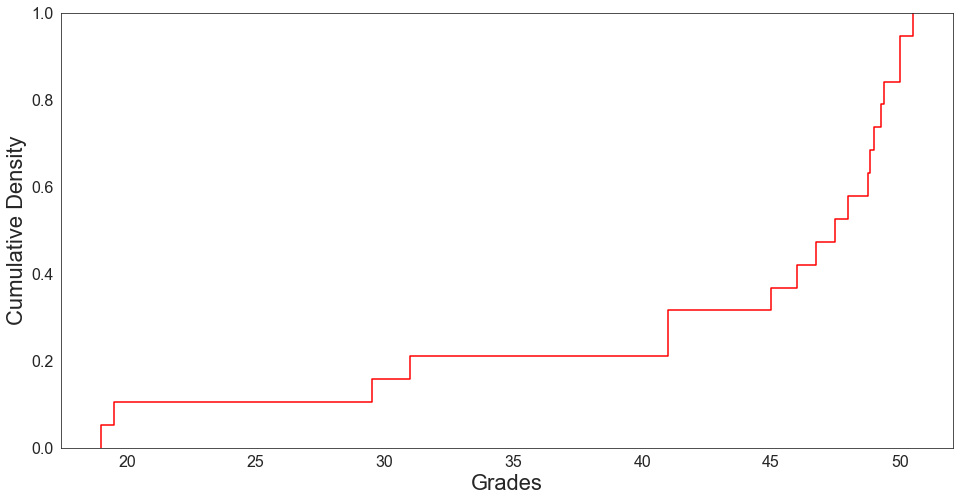

In [89]:
fig,ax=plt.subplots(figsize=(16,8))
here = DATA.query('ConfusionMatrix=="Ignored but At-risk"')

sns.ecdfplot(here.SemAvg_y, color = 'red')

plt.xticks(fontsize=16)
plt.xlabel('Grades', fontsize=22)
plt.ylabel('Cumulative Density', fontsize=22)
plt.yticks(fontsize=16)

# plt.tight_layout()
plt.savefig(fr'{loginPicPath}\CDFYOSIgnoredRisk.pdf', dpi=100, transparent=False) 

In [90]:
pd.concat([abs(here[['SemAvg_y']].describe()-51), abs(here2[['SemAvg_y']].describe()-51)],axis = 1)

NameError: name 'here2' is not defined

In [91]:
loginPicPath = r'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\WRITING\FIGURES\FINAL\ANALYSIS\LOGINS'

C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



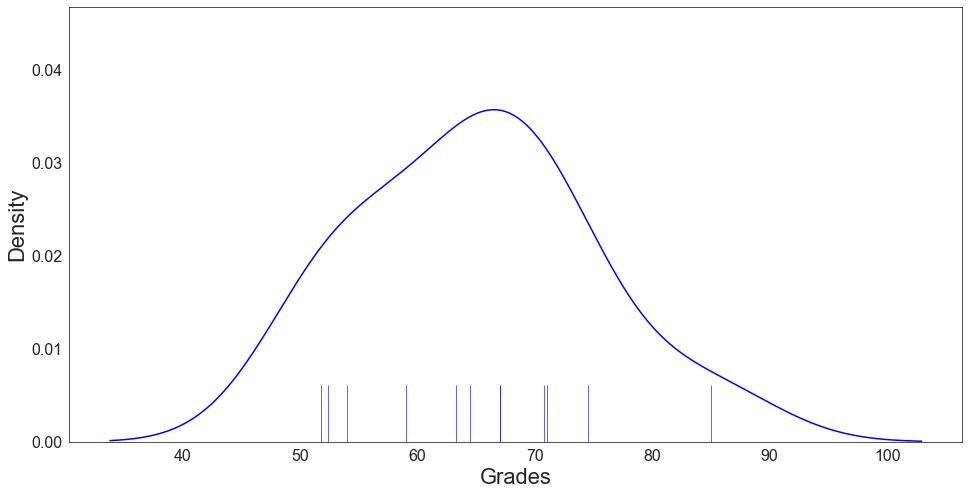

In [95]:
fig,ax=plt.subplots(figsize=(16,8))
here2 = DATA.query('ConfusionMatrix=="Flagged but Safe"')

sns.distplot(here2.SemAvg_y, rug=True, bins = 10, color = 'blue', rug_kws={"color": "blue", "alpha": 1., "linewidth": .6, "height":0.13},hist=False)


plt.xticks(fontsize=16)
plt.xlabel('Grades', fontsize=22)
plt.ylabel('Density', fontsize=22)
plt.yticks(fontsize=16)
ax.grid(False)


# plt.tight_layout()
plt.savefig(fr'{loginPicPath}\YOSFlaggedSafe.pdf', dpi=100, transparent=False) 

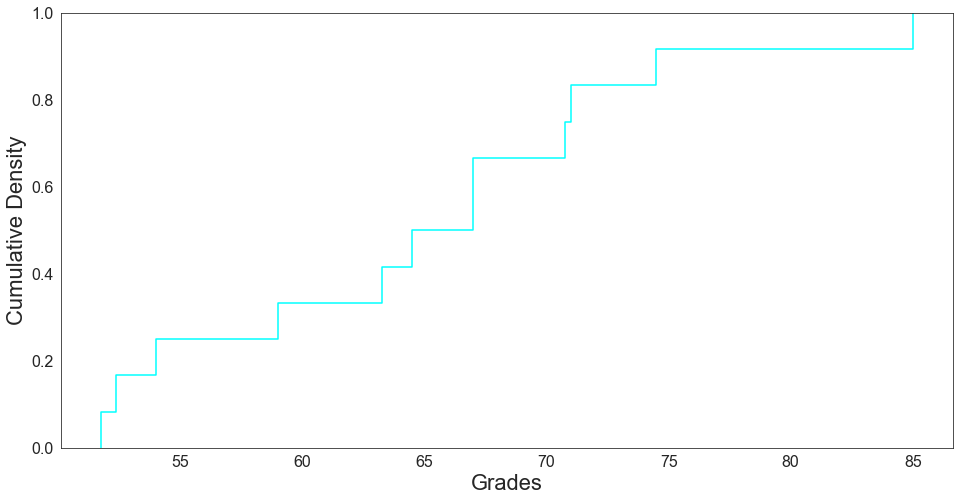

In [96]:
fig,ax=plt.subplots(figsize=(16,8))
here2 = DATA.query('ConfusionMatrix=="Flagged but Safe"')

sns.ecdfplot(here2.SemAvg_y, color = 'cyan')


plt.xticks(fontsize=16)
plt.xlabel('Grades', fontsize=22)
plt.ylabel('Cumulative Density', fontsize=22)
plt.yticks(fontsize=16)
# plt.tight_layout()
plt.savefig(fr'{loginPicPath}\CDFYOSFlaggedSafe.pdf', dpi=100, transparent=False) 

In [97]:
newLog = log_posts_stat_ques.copy().sort_values('SemAvg_y')
newLog['CumProb'] = 1 / 1133
newLog['CumProb'] = newLog['CumProb'].cumsum()
# find where to draw the CumSum line on the cumulative probability axis (CumProb = 0.276258)
newLog.query('CumProb>0.273610 and CumProb<0.500441')[['SemAvg_y', 'CumProb']].shape[0]

256

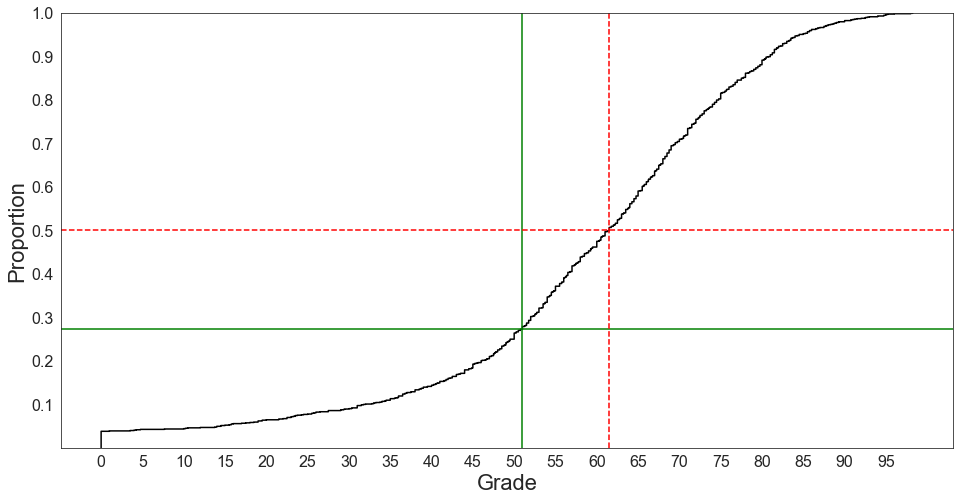

In [98]:
fig,ax=plt.subplots(figsize=(16,8))
here3 = log_posts_stat_ques

sns.ecdfplot(here3.SemAvg_y, color = 'black')


plt.xticks(range(0,100,5),fontsize=16)
plt.xlabel('Grade', fontsize=22)
plt.ylabel('Proportion', fontsize=22)
plt.yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1],fontsize=16)
plt.axvline(x=51, color='green', linestyle='-')
plt.axhline(y=0.273610, color='green', linestyle='-')
plt.axvline(x=61.5, color='red', linestyle='--')
plt.axhline(y=0.500441, color='red', linestyle='--')
ax.grid(False)
# plt.tight_layout()
plt.savefig(fr'{loginPicPath}\CDFAllStudentGrades.pdf', dpi=100, transparent=False) 

shows the cumulative density of the student\footnote{The cumulative frequency could have been used, however, the cumulative density normalises the frequencies so that the y-axis shows proportions and not absolute freqeuncies} between , except it shows the empirical probability (given by Cumulative Density) of a student's Grade being below the corresponding Grades value. From the sample, observe that there are more students who were safe than those who were at-risk.
The Cumulative Distribution curve shows that the probability that a student chosen at random was at risk of failing their programme (Grade < 51) is 0.27 (Given by the Probability and Grade values shown by the green lines). The remaining 63\% of the students were Safe.

 

In [99]:
here2.median()-51

0                                -50.429206
1                                -50.424307
2                                -50.448154
3                                -50.455781
4                                -50.448788
5                                -50.453057
6                                -50.450102
7                                -50.451552
8                                -50.450587
9                                -50.450154
10                               -50.449205
11                               -50.447485
12                               -50.448671
13                               -50.445378
14                               -50.442126
15                               -50.392551
16                               -50.352488
17                               -50.341846
18                               -50.358021
19                               -50.577882
20                               -50.506220
21                               -50.538673
22                              

In [100]:

# g = sns.FacetGrid(DATA, #the dataframe to pull from
#                   row="ConfusionMatrix", #define the column for each subplot row to be differentiated by
#                   hue="ConfusionMatrix", #define the column for each subplot color to be differentiated by
#                   aspect=5, #aspect * height = width
#                   height=2, #height of each subplot
# #                   palette=[ '#4285F4', '#FBBC05', '#EA4335','#34A853'],#google colors
#                   palette=['red'],#google colors
#                   hue_order = ['Ignored but At-risk']
#                  )

# g.map(sns.kdeplot, "SemAvg_y", shade=True, alpha=.25, lw=.5, bw=0.2)
# g.map(sns.kdeplot, "SemAvg_y", lw=2, bw=0.2)
# g.map(sns.rugplot, "SemAvg_y", height = .15)

# # plt.axvline(51, 0, 5)

# def label(x, color, label):
#     ax = plt.gca() #get the axes of the current object
#     ax.text(0, .2, #location of text
#             label, #text label
#             fontweight="bold", color=color, size=20, #text attributes
#             ha="right", va="center", #alignment specifications
#             transform=ax.transAxes) #specify axes of transformation

# g.map(label, "SemAvg_y") #the function counts as a plotting object!


# #prevent overlapping issues by 'removing' axis face color
# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# g.fig.subplots_adjust(hspace=-1)
# # plt.axvline(51, 0, 7)

# g.set_titles("") #set title to blank
# g.set(yticks=[]) #set y ticks to blank
# g.set(xticks=range(45,91,5)) #set y ticks to blank
# g.despine(bottom=True, left=True) #remove 'spines'
# plt.xticks(fontsize=16)
# plt.xlabel('Student Grades (Flagged but Safe)', fontsize=22)
# # plt.tight_layout()
# plt.savefig(fr'{loginPicPath}\YOSFlaggedSafe.pdf', dpi=1000, transparent=False) 

In [101]:

# g = sns.FacetGrid(DATA, #the dataframe to pull from
#                   row="ConfusionMatrix", #define the column for each subplot row to be differentiated by
#                   hue="ConfusionMatrix", #define the column for each subplot color to be differentiated by
#                   aspect=5, #aspect * height = width
#                   height=2, #height of each subplot
# #                   palette=[ '#4285F4', '#FBBC05', '#EA4335','#34A853'],#google colors
#                   palette=['cyan', '#EA4335','#34A853'],#google colors
#                   hue_order = ['Flagged but Safe']
#                  )

# g.map(sns.kdeplot, "SemAvg_y", shade=True, alpha=.25, lw=.5, bw=0.2)
# g.map(sns.kdeplot, "SemAvg_y", lw=2, bw=0.2)
# g.map(sns.rugplot, "SemAvg_y", height = .15)

# # plt.axvline(51, 0, 5)

# def label(x, color, label):
#     ax = plt.gca() #get the axes of the current object
#     ax.text(0, .2, #location of text
#             label, #text label
#             fontweight="bold", color=color, size=20, #text attributes
#             ha="right", va="center", #alignment specifications
#             transform=ax.transAxes) #specify axes of transformation

# g.map(label, "SemAvg_y") #the function counts as a plotting object!


# #prevent overlapping issues by 'removing' axis face color
# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# g.fig.subplots_adjust(hspace=-1)
# # plt.axvline(51, 0, 7)

# g.set_titles("") #set title to blank
# g.set(yticks=[]) #set y ticks to blank
# g.set(xticks=range(45,91,5)) #set y ticks to blank
# g.despine(bottom=True, left=True) #remove 'spines'
# plt.xticks(fontsize=16)
# plt.xlabel('Student Grades (Flagged but Safe)', fontsize=22)
# # plt.tight_layout()
# plt.savefig(fr'{loginPicPath}\YOSFlaggedSafe.pdf', dpi=1000, transparent=False) 

In [102]:
## Keep only statistically significant idnumbers for the relationship between time series and predictions 

The plot in Figure~\ref{fig: Grade Distribution of the Ignored but At-risk Students} shows the grade Distribution of the Ignored but At-risk students. These students exhibited a \textit{Safe} login pattern and thus Ignored by B-PM as students who were At-risk. Students who are At-risk are the reason for the research contained herein. Thus, the high safety rating assigned by the B-PM to the 19 out of the 46 students who should have been Flagged presents an opportunity for the B-PM to improve its recall of students at risk by 0.41. Although a trade-off exists between the precision and recall of At-risk and Safe students, maximising the recall of the At-risk Outcome group (flagging all students who are meant to be flagged) seems to be the focal point of a system that is designed to destinguish students risk-profiles from their online behaviour and personalities. In this analysis, upon closer examination, 15 of the 19 studens who were misclassified had Grades grater than 40 points. 5 of these falsely Ignored students achieved Grade points of greater than 49 points and may have passed the year, depending on the rules of the faculty with which the student registered. However, our threshold of 51 provides a buffer that allows B-PM to reveal students who were at risk of failing, not those who necessarily ended up failing.
\newpara
The plot in Figure~\ref{fig: Grade Distribution of the Flagged but Safe Students} shows the grade Distribution of the Flagged but Safe students. Unlike the Ignored but At-risk Classification Group, the Flagged but Safe group has a larger Grade dispersion. While the presence of a Flagged but Safe group reduces the precision of the Flagged group, the  Flagged but Safe group is considered a by-product of the classification model being able to Flag students. Compared to the number of students in the Ignored but At-risk group, the Flagged but Safe group has 7 fewer students in it.
\newpara
The next section reports on the results of a modified version of the B-PM model outlined in Table~\ref{}, without the Personality components. This model is referred to as the B-M model.
\subsection{Using Login Behaviour}

In [103]:
preds_df = preds_df.reset_index().rename(columns = {'Unnamed: 0': 'idx'}).set_index('idx', drop=True)
preds_df_ts = preds_df.loc[:,'9':'25']
# preds_df_ts.columns = range(1,18)
preds_df['LogSum'] = preds_df_ts.sum(axis=1)
testEndResults = testEndResults.reset_index().rename(columns = {'Unnamed: 0': 'idx'}).set_index('idx', drop=True)
testEndResults_ts = testEndResults.loc[:,'9':'25']
# testEndResults_ts.columns = range(1,18)
logs_id_pers_ts = logs_id_pers.loc[:,wantWeeks]
logs_id_pers_ts.columns = range(1,22)

In [104]:
preds_df_ts

9        10        11        12        13        14        15  \
idx                                                                          
620   0.329962  0.443266  0.488314  0.336832  0.412935  0.286243  0.257509   
1114  0.549846  0.550795  0.552515  0.551329  0.554622  0.557874  0.369438   
875   0.723795  0.833554  0.735978  0.286430  0.260673  0.307263  0.218102   
813   0.647816  0.684170  0.629681  0.557914  0.556121  0.481788  0.480806   
806   0.852002  0.851927  0.921520  0.913794  0.905621  0.903459  0.908457   
...        ...       ...       ...       ...       ...       ...       ...   
1125  0.600305  0.554614  0.558610  0.707000  0.718611  0.702334  0.688782   
180   0.549846  0.550795  0.552515  0.551329  0.554622  0.557874  0.645531   
990   0.884109  0.898854  0.926365  0.923475  0.908681  0.932754  0.956444   
119   0.549846  0.550795  0.552515  0.551329  0.554622  0.557874  0.607449   
706   0.534753  0.545655  0.545416  0.661379  0.497895  0.381514  0.413877   

            16        17        18        19        20        21        22  \
idx                                                                          
620   0.132571  0.031100  0.021926  0.013679  0.011700  0.009406  0.013238   
1114  0.186069  0.096181  0.055935  0.034382  0.741454  0.680649  0.712563   
875   0.226749  0.946445  0.985644  0.997211  0.999739  0.999868  0.999936   
813   0.572614  0.920678  0.957994  0.935844  0.964193  0.971873  0.997640   
806   0.863465  0.910984  0.967300  0.945207  0.915716  0.607439  0.641404   
...        ...       ...       ...       ...       ...       ...       ...   
1125  0.739465  0.651037  0.723789  0.505252  0.398245  0.360931  0.295035   
180   0.699747  0.687491  0.732006  0.756271  0.773027  0.622174  0.894293   
990   0.934953  0.737855  0.546731  0.175497  0.273441  0.375095  0.476149   
119   0.644902  0.609244  0.657544  0.415166  0.295906  0.251592  0.276636   
706   0.555890  0.627912  0.915702  0.757977  0.908188  0.916872  0.937371   

            23        24        25  
idx                                 
620   0.001193  0.000699  0.000359  
1114  0.652070  0.640479  0.693007  
875   0.999672  0.999682  0.999595  
813   0.996761  0.998115  0.999080  
806   0.542460  0.334653  0.529772  
...        ...       ...       ...  
1125  0.167939  0.134226  0.139196  
180   0.910060  0.947531  0.972750  
990   0.445197  0.338703  0.253699  
119   0.279036  0.296528  0.354113  
706   0.961756  0.963430  0.913488  

[170 rows x 17 columns]

In [105]:
logs_id_pers.SemesterFiftyOne.value_counts()

1    824
0    309
Name: SemesterFiftyOne, dtype: int64

In [106]:
logs_id_pers_tsActiveWeeks = pd.DataFrame(columns = logs_id_pers_ts.columns, index=logs_id_pers_ts.index, data = np.where(logs_id_pers_ts>=1, 1,0))

# Descriptive statistics (on ALL (`logs_id_pers`) data)
We take the mean of each week's logins

In [107]:
logs_id_pers_tsActiveWeeksCount = pd.DataFrame(columns = ['StudentCount'], data = logs_id_pers_tsActiveWeeks.sum())

In [108]:
logs_id_pers_tsActiveWeeksCount

StudentCount
1             24
2            681
3            670
4            687
5            670
6            652
7            661
8            616
9            988
10          1026
11           978
12          1010
13          1019
14           969
15           897
16           961
17           859
18           895
19           986
20           904
21           540

In [109]:
import plotly.express as px
sns.set_style('white')

fig = px.bar(logs_id_pers_tsActiveWeeksCount, x=logs_id_pers_tsActiveWeeksCount.index, y="StudentCount",
            labels={
                     "StudentCount": "Number of Students",
                     "index": "Week Number",
                    }
                )
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1))
fig.show()

## Get the number of active students per Outcome Category

In [110]:
logs_id_persActiveWeeks = logs_id_pers_tsActiveWeeks
logs_id_persActiveWeeks['SemesterFiftyOne'] = logs_id_pers['SemesterFiftyOne'] 
logs_id_persActiveWeeks01 = logs_id_persActiveWeeks.groupby('SemesterFiftyOne', as_index=True).sum()

In [111]:
logs_id_persActiveWeeks01 = logs_id_persActiveWeeks01.transpose()

In [112]:
logs_id_persActiveWeeks01.columns = ['Zero', 'One']
logs_id_persActiveWeeks01['Zero'] = logs_id_persActiveWeeks01['Zero']/len(logs_id_pers.query('SemesterFiftyOne==0'))
logs_id_persActiveWeeks01['One'] = logs_id_persActiveWeeks01['One']/len(logs_id_pers.query('SemesterFiftyOne==1'))

In [113]:
logs_id_persActiveWeeks01 = logs_id_persActiveWeeks01*100

In [114]:
wantWeeks

array([ 0,  3,  4,  5,  6,  8, 10, 12, 16, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 28, 29, 30])

In [115]:
logs_id_persActiveWeeks01TEST = logs_id_persActiveWeeks01.copy()
logs_id_persActiveWeeks01TEST[4:8] = logs_id_persActiveWeeks01TEST[4:8]+14.545
logs_id_persActiveWeeks01TEST = logs_id_persActiveWeeks01TEST[4:]
logs_id_persActiveWeeks01TEST[:3] = logs_id_persActiveWeeks01TEST[:3]+7.945
logs_id_persActiveWeeks01TEST.iloc[3] = logs_id_persActiveWeeks01TEST.iloc[3]+4.945

naught = logs_id_persActiveWeeks01TEST.copy().iloc[0]
tee = logs_id_persActiveWeeks01TEST.copy().iloc[1]
logs_id_persActiveWeeks01TEST.iloc[1] = naught
logs_id_persActiveWeeks01TEST.iloc[0] = tee
logs_id_persActiveWeeks01TEST.iloc[3] = logs_id_persActiveWeeks01TEST.iloc[3]+4.945
logs_id_persActiveWeeks01TEST.iloc[0].Zero = 67.680 


logs_id_persActiveWeeks01TEST.index = range(1,18)


In [116]:
logs_id_persActiveWeeks01TEST

Zero        One
1   67.680000  83.169612
2   76.211683  83.655049
3   74.917184  83.048252
4   70.066068  82.080631
5   80.582524  89.684466
6   77.022654  95.631068
7   69.579288  92.597087
8   73.786408  94.902913
9   77.022654  94.781553
10  73.139159  90.169903
11  61.165049  85.922330
12  68.284790  91.019417
13  56.634304  83.009709
14  60.194175  86.043689
15  68.284790  94.053398
16  55.663430  88.834951
17  27.184466  55.339806

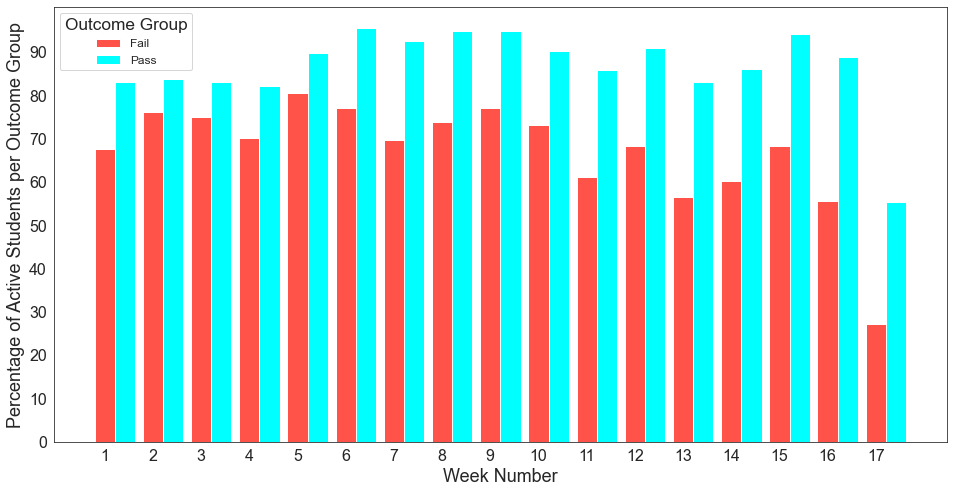

In [117]:
DATA = logs_id_persActiveWeeks01TEST
sns.set_style('white')

fig,ax=plt.subplots(figsize=(16,8))
width = 0.42       
plt.bar(DATA.index, DATA['Zero'], width, label='Fail', color = '#ff5349')
plt.bar(DATA.index + width, DATA['One'], width, label='Pass', color = 'cyan')

plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Percentage of Active Students per Outcome Group', fontsize=18)

plt.xticks(range(1,18),fontsize=16)
plt.yticks(range(0,100,10),fontsize=16)


plt.legend(loc='upper left', fontsize='large', title_fontsize = 'xx-large', fancybox=True, title="Outcome Group")
# plt.tight_layout()
plt.savefig(fr'{loginPicPath}\weekOutcomePerc.pdf', dpi=1000, transparent=False) 
plt.show()

for each index we want to calculate the correlation between the ts of that idx with the prediction

In [118]:
# find the correlations and the associated p values
correlRs = []
correlPs = []
for idx in preds_df.index:
    correl = sp.stats.pearsonr(testEndResults_ts.loc[idx][1:],preds_df_ts.loc[idx][1:])
#     correl = sp.stats.pearsonr(testEndResults_ts.loc[idx].diff()[1:],preds_df_ts.loc[idx].diff()[1:])
#     also yields 36 (25+11) instead of 27+9 
    correlR = correl[0]
    correlRs.append(correlR)
    correlP = correl[1]
    correlPs.append(correlP)
# correlRs, correlPs are the correlation lists of r values and p values 

In [119]:
testEndResults_ts

9   10   11   12   13   14   15   16   17   18   19   20   21   22  \
idx                                                                          
620   7.0  2.0  1.0  4.0  3.0  2.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0   
1114  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  2.0  2.0   
875   3.0  5.0  0.0  0.0  0.0  1.0  0.0  1.0  4.0  4.0  4.0  6.0  4.0  2.0   
813   2.0  3.0  1.0  1.0  2.0  4.0  0.0  0.0  5.0  4.0  5.0  5.0  3.0  2.0   
806   4.0  4.0  5.0  4.0  5.0  4.0  0.0  3.0  3.0  4.0  3.0  2.0  1.0  4.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1125  3.0  1.0  2.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
180   0.0  0.0  0.0  0.0  0.0  0.0  3.0  5.0  5.0  4.0  4.0  5.0  3.0  0.0   
990   5.0  5.0  3.0  3.0  2.0  3.0  0.0  2.0  5.0  2.0  6.0  4.0  4.0  4.0   
119   0.0  0.0  0.0  0.0  0.0  0.0  2.0  4.0  1.0  2.0  0.0  1.0  2.0  3.0   
706   4.0  3.0  1.0  3.0  0.0  4.0  0.0  2.0  1.0  3.0  1.0  2.0  1.0  3.0   

       23   24   25  
idx                  
620   0.0  0.0  0.0  
1114  1.0  2.0  2.0  
875   2.0  3.0  2.0  
813   5.0  4.0  4.0  
806   0.0  1.0  2.0  
...   ...  ...  ...  
1125  0.0  0.0  0.0  
180   3.0  3.0  1.0  
990   2.0  3.0  1.0  
119   0.0  1.0  0.0  
706   3.0  2.0  1.0  

[170 rows x 17 columns]

In [120]:
## Find the autocorrelation between two time series 

In [121]:
preds_df['CorrelRs'] = correlRs
preds_df['CorrelPs'] = correlPs



In [122]:
preds_df.query('ConfusionMatrix=="False Safe"').sort_values(ascending=False, by='SemAvg_y')

idnumber         0         1         2  \
idx                                                                    
1111  ad902448e0b85f074c1af120809e5d6e  0.570794  0.579937  0.597355   
205   83BA0FDE0407F88B4FCBD4F2D0A4C84C  0.570794  0.566231  0.537745   
323   CF79EA184CF896F46676F2071EC1824A  0.570794  0.566231  0.537745   
1094  b03bc37e13db1a2407a745214453c675  0.570794  0.579937  0.594534   
902   2281b02cae410cff8a7f641541bf819c  0.570794  0.566231  0.627528   
675   c9af7a98790205aefa55b3b8bea25fe2  0.570794  0.575693  0.555056   
1052  c001009a782210dc9541ff05b295030e  0.616954  0.640335  0.538648   
827   ad1368daf1ef2a740c4e4df5811d5210  0.570794  0.575693  0.588547   
834   5ba9a7ce49c7ae29423c4db00a9fe630  0.570794  0.575693  0.610037   
105   480239368CF465A69E16FC11042F1932  0.570794  0.566231  0.537745   
537   4bfe865c80eac61a58f2cc316712c535  0.570794  0.579937  0.583590   
275   AFAAD79A992D2CBA64F5F858345A2D59  0.570794  0.566231  0.537745   
360   E6137DA2732E02F11CFBEB0B61A9110B  0.570794  0.566231  0.537745   
130   53C7FB922FD5800B16ED50596BEBFA9D  0.570794  0.566231  0.537745   
644   324387d50b0e69c4f429cd4752745f27  0.570794  0.566231  0.630517   
1114  bd428a330a3033b207e7819612ee53b0  0.570794  0.566231  0.537745   
219   8CC89E2B8FB46C4965CB75F3DC9675D7  0.570794  0.566231  0.537745   
704   6060645669d6fadfa12894200788d49a  0.570794  0.575693  0.565340   
1073  05ba58939a06485ee01af054d1dfc9cc  0.616954  0.640335  0.636469   

             3         4         5         6         7         8  ...  \
idx                                                               ...   
1111  0.605686  0.515359  0.417539  0.541776  0.568855  0.383670  ...   
205   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
323   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
1094  0.586488  0.618594  0.503769  0.520286  0.612821  0.601573  ...   
902   0.602506  0.646560  0.624942  0.728728  0.857499  0.851362  ...   
675   0.568344  0.555843  0.585131  0.649158  0.696057  0.723726  ...   
1052  0.570135  0.379070  0.487628  0.531170  0.662267  0.721913  ...   
827   0.491169  0.740243  0.776358  0.768569  0.819473  0.795912  ...   
834   0.625332  0.584448  0.632220  0.647629  0.780293  0.828322  ...   
105   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
537   0.536627  0.541281  0.640264  0.691420  0.351385  0.338541  ...   
275   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
360   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
130   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
644   0.646535  0.669765  0.582462  0.630562  0.688039  0.655195  ...   
1114  0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
219   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
704   0.592703  0.589968  0.389777  0.439760  0.450853  0.518798  ...   
1073  0.660263  0.677483  0.561267  0.526036  0.618883  0.737181  ...   

           YOS  SemAvg_y  SemesterFiftyOne  LSTMPredictionYOS  \
idx                                                             
1111  0.965867  0.505000                 0                  1   
205   0.990604  0.500000                 0                  1   
323   0.995710  0.500000                 0                  1   
1094  0.978348  0.494000                 0                  1   
902   0.999988  0.492500                 0                  1   
675   0.998719  0.490000                 0                  1   
1052  0.997334  0.488571                 0                  1   
827   0.999999  0.487500                 0                  1   
834   0.999948  0.480000                 0                  1   
105   0.996981  0.475000                 0                  1   
537   0.667459  0.467500                 0                  1   
275   0.909934  0.460000                 0                  1   
360   0.999041  0.450000                 0                  1   
130   0.

In [123]:
preds_df[preds_df['CorrelPs']<.05].ConfusionMatrix.value_counts()

True Safe     27
True Flag      9
False Safe     5
False Flag     2
Name: ConfusionMatrix, dtype: int64

In [124]:
preds_df.ConfusionMatrix.value_counts()

True Safe     112
True Flag      27
False Safe     19
False Flag     12
Name: ConfusionMatrix, dtype: int64

In [125]:
(25+11)/(112+27)


0.2589928057553957

In [126]:
# print('proportion of each group with significant p values')
# # True Safe     
# print(' True Safe: ', 79/(97))
# # True Flag     
# print(' True Flag: ', 18/(26))
# # False Safe  
# print('False Safe: ', 15/(20))
# # False Flag   
# print('False Flag: ', 21/(27))
# print('Overall: ', 133/170)

How are the predictions influenced by changes in their own behaviour?

Let $r(Ps,Ls)$ represent the pearson correlation coefficient between $Ps$ and $Ls$ of student $s$. Let $p(Ps,Ls)$ indicate the associated p value of $r(Ps,Ls)$ that measures the probability that of an uncorrelated system producing an abosolute value of $r(Ps,Ls)$ that is at least as high as $r(Ps,Ls)$.\footnote{Adapted definition from \cite{pearsonrscipy}. Refer to chapter~\ref{chapter: Background and Related Work} for a detailed definition of p-value}. 

Table~\ref{table: Sample -- $r(Ps,Ls)$ Values for Test Set} shows the Sample -- $r(Ps,Ls)$ Values for the Test Set.

After computing $r(Ps,Ls)$ for each student $s$, there were 92 students in the test set whose $r(Ps,Ls)$ were significant at a 5\% level of significance ($p(Ps,Ls)<0.05$). Table~\ref{table:} shows the number of students from each Risk Classification category with statistically significant $r$ values 

Of the students in the True Safe group, 53.6 percent of them had statistically significant p-values for their correlations between $Ls$ and $Ps$ values. That is to say that the the changes in the predictions of Risk for True Safe students moved together with their changes on behaviour with a statistically significant $r$. 



the 11 pp difference in the proportion of statistically significant p-values in the 

In [127]:
preds_df_nonsignif = preds_df[preds_df['CorrelPs']>.05]
preds_df_signif = preds_df[preds_df['CorrelPs']<=.05]

Show the descriptive statistics of each group's r value

table: Sample -- $r(Ps,Ls)$ and $p(Ps,Ls)$ Values for Test Set

In [128]:

print(preds_df.sample(5)[['CorrelRs', 'CorrelPs']].to_latex(caption='CaptionHere', longtable=False, index=True))

\begin{table}
\centering
\caption{CaptionHere}
\begin{tabular}{lrr}
\toprule
{} &  CorrelRs &  CorrelPs \\
idx  &           &           \\
\midrule
537  &  0.534703 &  0.032845 \\
32   &  0.492178 &  0.052792 \\
1065 &  0.088109 &  0.745576 \\
383  &  0.310543 &  0.241745 \\
759  &  0.348719 &  0.185590 \\
\bottomrule
\end{tabular}
\end{table}



In [129]:
preds_df.loc[939][['CorrelRs', 'CorrelPs']]

CorrelRs     0.469013
CorrelPs    0.0668539
Name: 939, dtype: object

In [130]:
print(pd.concat([preds_df_signif.CorrelRs.describe(), preds_df_nonsignif.CorrelRs.describe()],axis=1).to_latex(caption='CaptionHere', longtable=False, index=True))

\begin{table}
\centering
\caption{CaptionHere}
\begin{tabular}{lrr}
\toprule
{} &   CorrelRs &    CorrelRs \\
\midrule
count &  43.000000 &  127.000000 \\
mean  &   0.650655 &    0.123339 \\
std   &   0.103939 &    0.242105 \\
min   &   0.506465 &   -0.456082 \\
25\%   &   0.560324 &   -0.044807 \\
50\%   &   0.634079 &    0.174824 \\
75\%   &   0.710840 &    0.311879 \\
max   &   0.898773 &    0.492178 \\
\bottomrule
\end{tabular}
\end{table}



In [131]:
sp.stats.ttest_ind(preds_df_signif.CorrelRs,preds_df_nonsignif.CorrelRs)

Ttest_indResult(statistic=13.835700485088752, pvalue=1.5064327690439956e-29)

Find an observation that has an r value that is close to the mean

In [132]:
preds_df[preds_df['CorrelRs']<=1.].sort_values('CorrelRs', ascending = False).head(30)

idnumber         0         1         2  \
idx                                                                    
1076  298adb5d534070d0388fe3331b86c9df  0.570794  0.579063  0.579086   
1119  6df978b8d2927fd807f3a0845c0bf0cd  0.570794  0.575693  0.565340   
200   7E5902D69D49B50F7E637A8894C0BEA1  0.570794  0.566231  0.537745   
1006  7a8dd9091ecadfe89d5363e2f1cdeebf  0.570794  0.575693  0.607127   
652   1d5650b0cd6636c695cf06267fdc9bd2  0.570794  0.566231  0.630517   
281   B4D61FB473450A5A4CD5B1F9258886EE  0.570794  0.566231  0.537745   
301   C051B66A069D6DCBF862EC37E14C8BE3  0.570794  0.566231  0.537745   
1077  d34a82095203dbf14b1ca57aeaee18f6  0.570794  0.562622  0.555167   
253   A552FB923D38AAB74A08DEA344989099  0.570794  0.566231  0.537745   
875   1420f73cbc00307be3ecbb46a0224db0  0.570794  0.566231  0.617278   
708   072cd8fe0ff2f36182eb24541a4155f4  0.570794  0.575693  0.565340   
691   5032f3cad4afd9b72fce342911f235c1  0.570794  0.566231  0.537745   
620   e84bce0980a1e7b9844f5001e81d95e2  0.570794  0.566231  0.537745   
1095  fb3252aa9f3bfb0de6eefda9270abcd9  0.570794  0.566231  0.586677   
813   39e812a56c40e692f2bccb7b8226cd13  0.570794  0.566231  0.630517   
18    0CD00F0B85A61F7C7825505BBBDBF715  0.570794  0.566231  0.537745   
501   90b6069a58a114fd15a5259d0d2c355a  0.570794  0.566231  0.627528   
1073  05ba58939a06485ee01af054d1dfc9cc  0.616954  0.640335  0.636469   
115   4BCDCB2030A357666D46298133890096  0.570794  0.566231  0.537745   
577   1ee66a3baa92e5ced7190c8433034d8f  0.570794  0.579937  0.583590   
685   ede8b3e30ead149feb8b9a906a397574  0.570794  0.566231  0.617278   
1114  bd428a330a3033b207e7819612ee53b0  0.570794  0.566231  0.537745   
360   E6137DA2732E02F11CFBEB0B61A9110B  0.570794  0.566231  0.537745   
40    2152CC655EA0F817ED7A7B42461CF3A8  0.570794  0.566231  0.537745   
193   79ED96226FF515011D8348A752F5250E  0.570794  0.566231  0.537745   
1098  02ea282cf639b7d60d434d6bbc62fde5  0.570794  0.575693  0.610037   
23    0FF6305E4E450085172C91F0ABDA815F  0.570794  0.566231  0.537745   
1030  aec2172f943f66327502af35a4122551  0.570794  0.579937  0.503171   
1106  c356b891ee8807fea96bdd38ec967c6b  0.570794  0.579937  0.575951   
205   83BA0FDE0407F88B4FCBD4F2D0A4C84C  0.570794  0.566231  0.537745   

             3         4         5         6         7         8  ...  \
idx                                                               ...   
1076  0.597653  0.627401  0.472116  0.462845  0.507662  0.351715  ...   
1119  0.581052  0.538469  0.368636  0.380804  0.414687  0.378853  ...   
200   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
1006  0.570334  0.595386  0.537800  0.500980  0.510931  0.368358  ...   
652   0.646076  0.666635  0.616619  0.694987  0.531993  0.486894  ...   
281   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
301   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
1077  0.563029  0.578247  0.499654  0.491908  0.601538  0.449271  ...   
253   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
875   0.632256  0.624159  0.575528  0.545229  0.585931  0.767584  ...   
708   0.567849  0.559013  0.732327  0.772524  0.814898  0.810281  ...   
691   0.571574  0.608331  0.314010  0.325732  0.482327  0.658730  ...   
620   0.556114  0.542667  0.419983  0.461585  0.247577  0.292126  ...   
1095  0.593025  0.538820  0.320570  0.215665  0.217778  0.366048  ...   
813   0.581178  0.527472  0.270491  0.392395  0.423348  0.678832  ...   
18    0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
501   0.635799  0.621506  0.620455  0.759299  0.805402  0.760558  ...   
1073  0.660263  0.677483  0.561267  0.526036  0.618883  0.737181  ...   
115   0.534264  0.531853  0.546943  0.549898  0.548448  0.549413  ...   
577   0.579411  0.577639  0.740187  0.678179  0.502589  0.366040  ...   
685   0.641029  0.656650  0.617326  0.705430  0.660588  0.648438  ...   
1114  0.534264  0.531853  0.546943  0.549898  

## Example of a highly correlated Good performer (True Safe)

In [133]:
s200Diffs = pd.concat([testEndResults_ts.loc[200].diff()[1:],preds_df_ts.loc[200].diff()[1:]],axis=1)
s200Diffs.columns = ['LsDiff', 'PsDiff']
s200 = pd.concat([testEndResults_ts.loc[200],preds_df_ts.loc[200]],axis=1)
s200.columns = ['Ls', 'Ps']
s200.index = range(1,18)
s200

Ls        Ps
1   0.0  0.549846
2   0.0  0.550795
3   0.0  0.552515
4   0.0  0.551329
5   0.0  0.554622
6   0.0  0.557874
7   3.0  0.645531
8   3.0  0.597770
9   2.0  0.542625
10  3.0  0.578066
11  3.0  0.706593
12  2.0  0.684272
13  1.0  0.503159
14  1.0  0.510316
15  4.0  0.861583
16  4.0  0.901293
17  5.0  0.940555

In [134]:
np.sqrt(0.338)

0.5813776741499453

In [135]:
DATA=s200 # alias s80 for ease
# DATA=s200Diff # alias s80 for ease

# OLS Summary
x_, y_ = 'Ls', 'Ps'
mod = smf.ols(formula=f'{y_}~{x_}', data=DATA)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                     Ps   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     32.03
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.54e-05
Time:                        22:50:05   Log-Likelihood:                 19.630
No. Observations:                  17   AIC:                            -35.26
Df Residuals:                      15   BIC:                            -33.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5117      0.029     17.458      0.0

C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\scipy\stats\stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17



In [136]:
pvalues = []
for stu in preds_df.index:
#     student = pd.concat([testEndResults_ts.loc[stu][1:],preds_df_ts.loc[stu][1:]],axis=1)
    student = pd.concat([testEndResults_ts.loc[stu].diff()[1:],preds_df_ts.loc[stu].diff()[1:]],axis=1)
#     student.columns = ['Ls', 'Ps']

    student.columns = ['LsDiff', 'PsDiff']
    DATA = student
    reg_pred = res.predict(DATA[x_])
    resid = DATA[y_] - reg_pred
    pvalues.append(sp.stats.normaltest(resid).pvalue)

KeyError: 'Ls'

In [ ]:
len([num for num in pvalues if num>.05])

In [ ]:
### Step 1: the time series of L939 vs P939

In [ ]:
# s200_wide = s200.pivot("year", "month", "passengers")

# sns.lineplot(s200, time=None, unit='Kind', condition='Company', value='Price')


In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
# make a plot
DAT = s200
ax.plot(DAT.index, DAT.Ls, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("Week Number",fontsize=14)
# set y-axis label
ax.set_ylabel("$L_{80}$ [No. of Logins]",color="blue",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(DAT.index, DAT.Ps,color="red",marker="o")
ax2.set_ylabel("$P_{80}$ [Safety Score]",color="red",fontsize=20)
plt.yticks(fontsize=16)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

### Step 2: the time series of DeltaL939 vs DeltaP939

### Step 3:  DeltaL939 vs DeltaP939 correlation

KeyError: 'Ls'

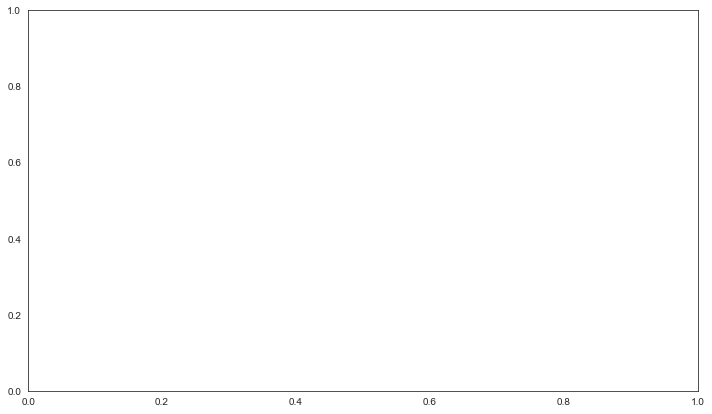

In [137]:
# matplotlib.rcParams['text.usetex'] = False


# OLS Plot
sns.set_style('white')
ax1, fig = plt.subplots(figsize=(12,7))
ax = sns.regplot(x=x_, y=y_, data=DATA, scatter_kws = {'color': 'teal', 'alpha':.59}, ci=None,line_kws = {'color': 'teal'})
plt.xlabel('${L_{80}}$ [No. of Logins]', fontsize=23, color = 'blue')
plt.ylabel('${P_{80}}$  [Safety Score]', fontsize=23, color = 'red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(DATA[x_].min()-0.2, DATA[x_].max()+0.2)
# ax.set_ylim(DATA[y_].min()-2.4, DATA[y_].max()+2.4)

# Normmality Residual Proof
reg_pred = res.predict(DATA[x_])
resid = DATA[y_] - reg_pred
print(sp.stats.normaltest(resid))

# Residual Acutocorrelation Proof
print('residual autocorrelation:')
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(resid,lags=len(resid)-1)



### Example of a highly correlated POOR performer (True Flag)

In [138]:
s327Diffs = pd.concat([testEndResults_ts.loc[327].diff()[1:],preds_df_ts.loc[327].diff()[1:]],axis=1)
s327Diffs.columns = ['LsDiff', 'PsDiff']
s327 = pd.concat([testEndResults_ts.loc[327],preds_df_ts.loc[327]],axis=1)
s327.columns = ['Ls', 'Ps']
s327.index = range(1,19)
s327

ValueError: Length mismatch: Expected axis has 17 elements, new values have 18 elements

In [139]:
np.sqrt(0.338)

0.5813776741499453

In [140]:
DATA=s327Diffs # alias s80 for ease

# OLS Summary
x_, y_ = 'LsDiff', 'PsDiff'
mod = smf.ols(formula=f'{y_}~{x_}', data=DATA)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 PsDiff   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     55.79
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           3.02e-06
Time:                        22:50:29   Log-Likelihood:                 29.291
No. Observations:                  16   AIC:                            -54.58
Df Residuals:                      14   BIC:                            -53.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0309      0.010     -2.977      0.0

C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\scipy\stats\stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [141]:
pvalues = []
for stu in preds_df.index:
    student = pd.concat([testEndResults_ts.loc[stu].diff()[1:],preds_df_ts.loc[stu].diff()[1:]],axis=1)
    student.columns = ['LsDiff', 'PsDiff']
    DATA = student
    reg_pred = res.predict(DATA[x_])
    resid = DATA[y_] - reg_pred
    pvalues.append(sp.stats.normaltest(resid).pvalue)

C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\scipy\stats\stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [142]:
len([num for num in pvalues if num>.05])

139

In [143]:
### Step 1: the time series of L939 vs P939

In [144]:
# s327_wide = s327.pivot("year", "month", "passengers")

# sns.lineplot(s327, time=None, unit='Kind', condition='Company', value='Price')


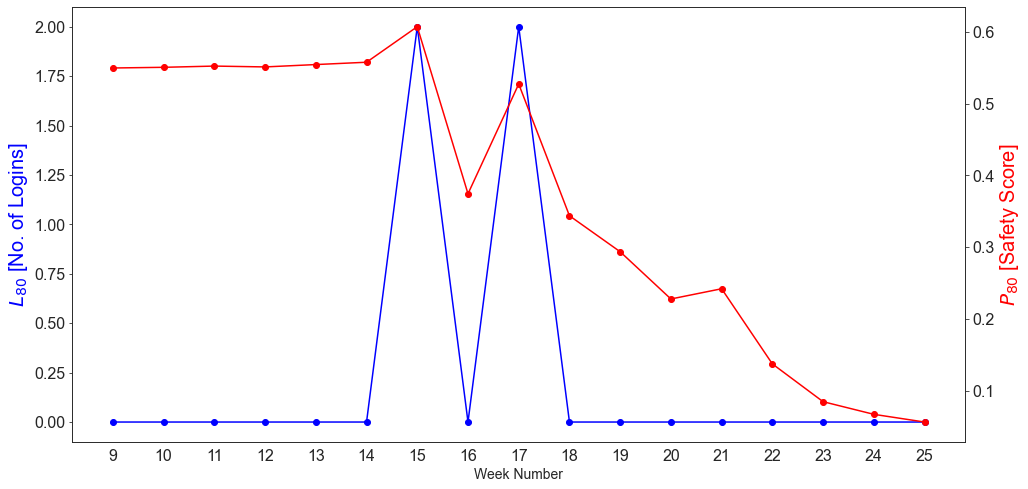

In [145]:
fig,ax = plt.subplots(figsize=(16,8))
# make a plot
DAT = s327
ax.plot(DAT.index, DAT.Ls, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("Week Number",fontsize=14)
# set y-axis label
ax.set_ylabel("$L_{80}$ [No. of Logins]",color="blue",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(DAT.index, DAT.Ps,color="red",marker="o")
ax2.set_ylabel("$P_{80}$ [Safety Score]",color="red",fontsize=20)
plt.yticks(fontsize=16)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

### Step 2: the time series of DeltaL939 vs DeltaP939

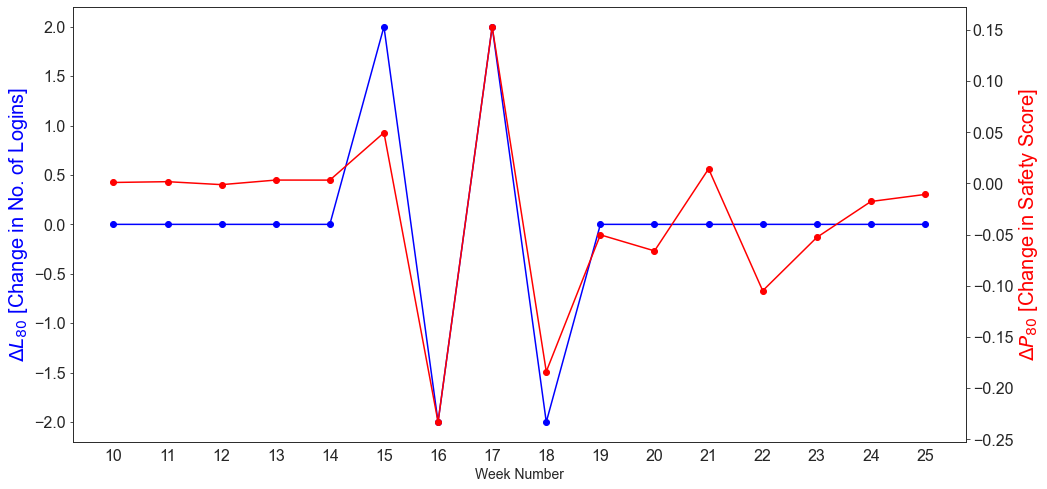

In [146]:
fig,ax = plt.subplots(figsize=(16,8))
# make a plot
DAT = s327Diffs
ax.plot(DAT.index, DAT.LsDiff, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("Week Number",fontsize=14)
# set y-axis label
ax.set_ylabel("$\Delta{L_{80}}$ [Change in No. of Logins]",color="blue",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(DAT.index, DAT.PsDiff,color="red",marker="o")
ax2.set_ylabel("$\Delta{P_{80}}$ [Change in Safety Score]",color="red",fontsize=20)
plt.yticks(fontsize=16)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

### Step 3:  DeltaL939 vs DeltaP939 correlation

NormaltestResult(statistic=11.835024918772701, pvalue=0.002691888036161844)
residual autocorrelation:


C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\scipy\stats\stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



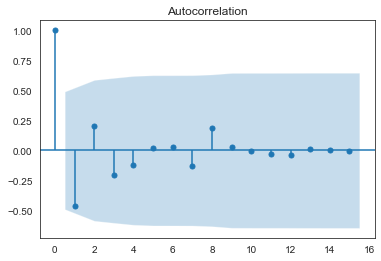

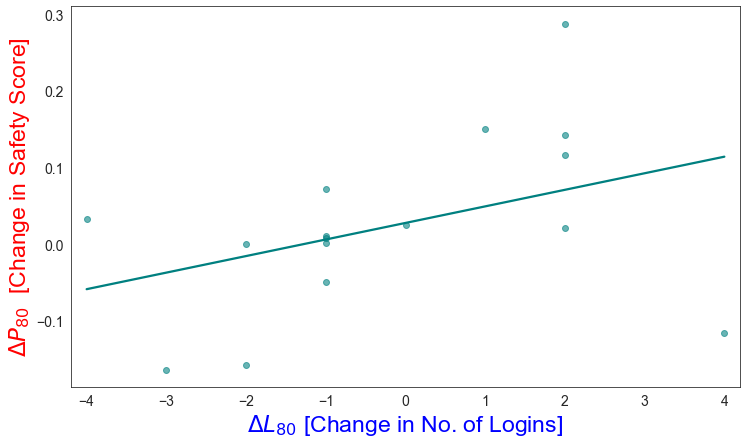

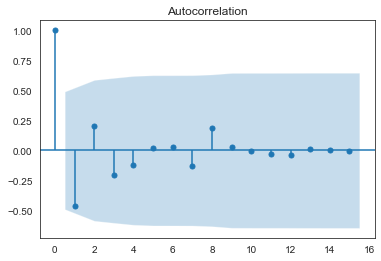

In [147]:
# matplotlib.rcParams['text.usetex'] = False


# OLS Plot
sns.set_style('white')
ax1, fig = plt.subplots(figsize=(12,7))
ax = sns.regplot(x=x_, y=y_, data=DATA, scatter_kws = {'color': 'teal', 'alpha':.59}, ci=None,line_kws = {'color': 'teal'})
plt.xlabel('$\Delta{L_{80}}$ [Change in No. of Logins]', fontsize=23, color = 'blue')
plt.ylabel('$\Delta{P_{80}}$  [Change in Safety Score]', fontsize=23, color = 'red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(DATA[x_].min()-0.2, DATA[x_].max()+0.2)
# ax.set_ylim(DATA[y_].min()-2.4, DATA[y_].max()+2.4)

# Normmality Residual Proof
reg_pred = res.predict(DATA[x_])
resid = DATA[y_] - reg_pred
print(sp.stats.normaltest(resid))

# Residual Acutocorrelation Proof
print('residual autocorrelation:')
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(resid,lags=len(resid)-1)



In [148]:
a = testEndResults.copy()
a['LogStdErrGrad'] = a.LogStdErrGrad*10
a['SemAvg_y'] = a.SemAvg_y*100
a['LogRvalue'] = (a['LogRvalue'])
a_ts = a.loc[:,'14':'30']
a['SumOfAbsDevsOld'] = (a_ts.sub(a_ts.mean(axis=1), axis=0)**2).mean(axis=1)

#Get the number of active weeks
a_ts_bin = pd.DataFrame(columns = a_ts.columns, index=a_ts.index, data = np.where(a_ts>0,1,0))
num_active = a_ts_bin.sum(axis=1)
#
# Get the average number of logins per week; controlled for the number of active weeks
a['Mean'] = a_ts.sum(axis=1)/num_active
a['SumOfAbsDevs'] = a_ts.sub(a['Mean'], axis=0).abs().mean(axis=1)

a['LogSum'] = a_ts.sum(axis=1)
a['NumActiveWeeks'] = num_active
#compute autocorrelation
def df_autocorr(df, lag=1, axis=1):
    """Compute full-sample column-wise autocorrelation for a DataFrame."""
    return df.apply(lambda col: col.autocorr(lag), axis=axis)


a['AutoCorrWith0s'] = df_autocorr(a_ts).fillna(0)
a['Consc']=a['LogSum']*a['AutoCorrWith0s']

In [149]:
b_ts = train_.iloc[:,15:32].reset_index()
b_ts = b_ts.drop('index', axis = 1)

b_ts_bin = pd.DataFrame(columns = b_ts.columns, index=b_ts.index, data = np.where(b_ts>0,1,0))
b_num_active = b_ts_bin.sum(axis=1)
b = b_ts.copy()
# Get the average number of logins per week; controlled for the number of active weeks
b['Mean'] = b_ts.sum(axis=1)/b_num_active
# b_ts.index = b_ts['index']
# b_ts = b_ts.drop('index', axis = 1)
# b_ts.columns = a_ts.columns

b['LogSum'] = b_ts.copy().sum(axis=1)
b['SemAvg_y'] = train_.SemAvg_y
c = pd.concat([b[['Mean','LogSum', 'SemAvg_y']], a[['Mean','LogSum', 'SemAvg_y']]], axis = 0)

In [150]:
c.max()

Mean         6.125
LogSum      98.000
SemAvg_y    98.250
dtype: float64

In [151]:
num_active

idx
620      5
1114     9
875     16
813     15
806     15
        ..
1125     1
180     14
990     16
119     12
706     15
Length: 170, dtype: int64

In [152]:
# a['LogRvalue'] = (a['LogRvalue'] - a['LogRvalue'].min())/(a['LogRvalue'].max()-a['LogRvalue'].min())

In [153]:
#  a['LogRvalue'] = MMS().fit_transform(np.array(a['LogRvalue']).reshape(-1,1))

In [154]:
# a['LogRvalue'] = sp.stats.boxcox(a['LogRvalue'])[0]

In [155]:
LogSumAvg = a.groupby('LogSum',as_index=False).mean()[['LogSum','SemAvg_y']]

In [156]:
a

idnumber    0    1    2    3    4    5    6  \
idx                                                                         
620   e84bce0980a1e7b9844f5001e81d95e2  0.0  0.0  0.0  4.0  3.0  3.0  4.0   
1114  bd428a330a3033b207e7819612ee53b0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
875   1420f73cbc00307be3ecbb46a0224db0  0.0  0.0  2.0  4.0  1.0  3.0  2.0   
813   39e812a56c40e692f2bccb7b8226cd13  0.0  0.0  3.0  1.0  2.0  1.0  3.0   
806   1ca614f0e20611cb82cd1751dfbe67c2  0.0  0.0  3.0  3.0  3.0  5.0  5.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
1125  538ad4510f78b36aebd6353f5a3e6ad1  0.0  1.0  3.0  2.0  2.0  3.0  3.0   
180   75803CCF819C001E1EB146B7CB91AEB9  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
990   4ddd47f420dd5f9139dea31122b558f4  0.0  5.0  3.0  1.0  5.0  5.0  3.0   
119   4E1063D80F4C9D7593197CFED4673161  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
706   13ba7716d45b3e6a6ba2954c655e9fa3  0.0  1.0  1.0  3.0  4.0  3.0  4.0   

        7    8  ...  ConfusionMatrix  LSTMPredictionLogStdErrGrad  \
idx             ...                                                 
620   0.0  3.0  ...        True Flag                            0   
1114  0.0  0.0  ...       False Safe                            1   
875   2.0  4.0  ...        True Safe                            1   
813   1.0  3.0  ...        True Safe                            1   
806   3.0  4.0  ...        True Safe                            1   
...   ...  ...  ...              ...                          ...   
1125  1.0  2.0  ...       False Flag                            0   
180   0.0  0.0  ...        True Safe                            1   
990   3.0  3.0  ...        True Safe                            0   
119   0.0  0.0  ...        True Flag                            1   
706   4.0  1.0  ...        True Safe                            1   

      LSTMPredictionProcrastination1  SumOfAbsDevsOld      Mean  SumOfAbsDevs  \
idx                                                                             
620                                0         0.477509  1.400000      1.129412   
1114                               1         1.294118  1.888889      1.202614   
875                                1         2.110727  2.812500      1.187500   
813                                1         2.359862  3.866667      1.184314   
806                                1         1.737024  2.600000      1.152941   
...                              ...              ...       ...           ...   
1125                               1         0.055363  1.000000      0.941176   
180                                1         3.397924  3.500000      1.617647   
990                                0         2.498270  3.000000      1.352941   
119                                1         1.266436  1.833333      1.029412   
706                                1         1.750865  2.133333      1.113725   

      LogSum  NumActiveWeeks  AutoCorrWith0s      Consc  
idx                                                      
620      7.0               5       -0.332971  -2.330798  
1114    17.0               9        0.235821   4.008955  
875     45.0              16        0.538613  24.237580  
813     58.0              15        0.160000   9.280026  
806     39.0              15       -0.248227  -9.680851  
...      ...             ...             ...        ...  
1125     1.0               1        0.000000   0.000000  
180     49.0              14        0.284802  13.955300  
990     48.0              16        0.093789   4.501862  
119     22.0              12       -0.012658  -0.278481  
706     32.0              15       -0.529803 -16.953694  

[170 rows x 50 columns]

In [157]:
aa = a[['Mean', 'SemAvg_y']]
bb = b[['Mean', 'SemAvg_y']]

logAvgGradeNew = pd.concat([aa,bb.query('((SemAvg_y<70) and (Mean<7))').sample(200, random_state=0)], axis = 0)


In [158]:
b

14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0    0.0  3.0  3.0  1.0  4.0  1.0  3.0  1.0  3.0  3.0  2.0  1.0  3.0  5.0   
1    3.0  0.0  2.0  2.0  4.0  6.0  6.0  5.0  5.0  4.0  3.0  0.0  1.0  2.0   
2    3.0  0.0  3.0  3.0  5.0  2.0  5.0  3.0  2.0  1.0  5.0  4.0  1.0  2.0   
3    4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.0  2.0  5.0  5.0  5.0  3.0  3.0  4.0  2.0  3.0  3.0  5.0  2.0  4.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
958  5.0  0.0  4.0  2.0  1.0  4.0  5.0  2.0  3.0  1.0  3.0  1.0  1.0  1.0   
959  0.0  0.0  1.0  3.0  2.0  4.0  2.0  2.0  5.0  1.0  2.0  1.0  2.0  3.0   
960  0.0  2.0  2.0  1.0  2.0  1.0  1.0  2.0  2.0  1.0  2.0  2.0  0.0  1.0   
961  0.0  0.0  0.0  1.0  2.0  3.0  1.0  1.0  3.0  2.0  2.0  0.0  0.0  2.0   
962  5.0  0.0  1.0  2.0  7.0  5.0  6.0  4.0  5.0  5.0  3.0  1.0  2.0  4.0   

      28   29   30      Mean  LogSum  SemAvg_y  
0    2.0  0.0  0.0  2.500000    35.0      76.0  
1    1.0  1.0  0.0  3.214286    45.0      63.5  
2    2.0  5.0  3.0  3.062500    49.0      69.0  
3    0.0  0.0  0.0  4.000000     4.0      77.0  
4    4.0  2.0  0.0  3.466667    52.0       0.0  
..   ...  ...  ...       ...     ...       ...  
958  5.0  2.0  2.0  2.625000    42.0      74.0  
959  3.0  3.0  0.0  2.428571    34.0      62.5  
960  1.0  0.0  0.0  1.538462    20.0       0.0  
961  1.0  1.0  0.0  1.727273    19.0       NaN  
962  4.0  1.0  0.0  3.666667    55.0      63.0  

[963 rows x 20 columns]

                            OLS Regression Results                            
Dep. Variable:               SemAvg_y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     36.79
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           3.41e-09
Time:                        22:52:45   Log-Likelihood:                -1489.7
No. Observations:                 352   AIC:                             2983.
Df Residuals:                     350   BIC:                             2991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.2578      2.959     12.928      0.0

C:\Users\bseot\anaconda3\envs\education2\lib\site-packages\numpy\core\_asarray.py:83: UserWarning:




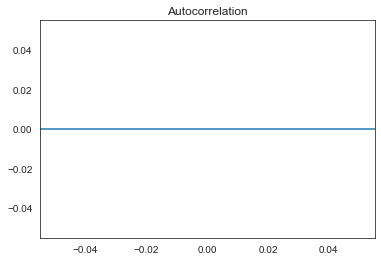

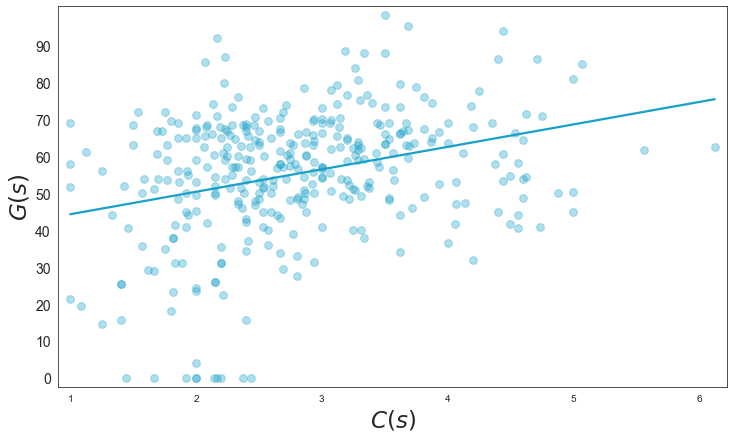

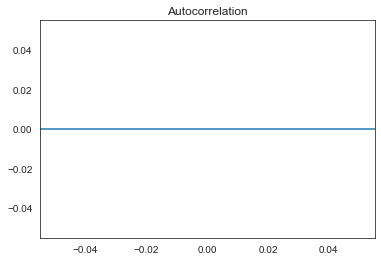

In [160]:
# This is wrong; C is per week. Check the code at the beginning of this notebook

DATA=c.query('(Mean>=0.5) and (Mean<=6.5)')
# DATA=c.query('LogSum<100')
# DATA=logAvgGradeNew.query('not((Mean<=2.7) and (SemAvg_y<=12)) and (SemAvg_y>=5)')
xyz = logAvgGradeNew.query('not((SemAvg_y<=25) and (Mean<=4.5) and (Mean>=2.5)) and not((SemAvg_y>=75) and (Mean<=2))')
DATA=xyz

# OLS Summary
x_, y_ = 'Mean', 'SemAvg_y'
# The pvalue reported on was from the Logsum since we don't see it here
mod = smf.ols(formula=f'{y_}~{x_}', data=DATA)
res = mod.fit()
print(res.summary())

# OLS Plot
sns.set_style('white')
ax1, fig = plt.subplots(figsize=(12,7))
ax = sns.regplot(x=x_, y=y_, data=DATA, scatter_kws = {'color': '#1aa1c9', 'alpha':.35, 's':60}, ci=None,line_kws = {'color': '#1aa1c9'})
plt.xlabel('$C(s)$', fontsize=23)
plt.ylabel('$G(s)$', fontsize=23)
# plt.xticks(range(1, 7, 1), fontsize=14)
plt.yticks(range(0,100,10), fontsize=14)
ax.set_xlim(DATA[x_].min()-.1, DATA[x_].max()+.1)
ax.set_ylim(DATA[y_].min()-2.4, DATA[y_].max()+2.4)
plt.savefig(fr'{loginPicPath}\logAvgGradeNew.pdf', dpi=1000, transparent=False)

# Normmality Residual Proof
reg_pred = res.predict(DATA[x_])
resid = DATA[y_] - reg_pred
print(sp.stats.normaltest(resid))

# Residual Acutocorrelation Proof
print('residual autocorrelation:')
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(resid,lags=len(resid)-1)



In [287]:
1e-4


0.0001

In [286]:
len(xyz.query('(Mean<3) and (SemAvg_y<51)')),len(xyz.query('SemAvg_y<51'))


(76, 102)

In [282]:
xyz.query('(SemAvg_y<5)')

Mean  SemAvg_y
128   1.923077      0.00
677        NaN      4.25
991   2.200000      0.00
150   1.444444      0.00
625   2.000000      0.00
1030  2.166667      0.00
327   1.666667      0.00
691        NaN      1.00
748   2.142857      0.00
778   2.400000      0.00
762   2.357143      0.00

In [279]:
np.sqrt(0.102)

0.31937438845342625

In [151]:
# sns.set_style('white')
# fig,ax1 = plt.subplots(figsize=(12,7))
# print('residual autocorrelation:')
# import statsmodels.api as sm
# ax = sm.graphics.tsa.plot_acf(resid,lags=len(resid)-1,ax=ax1,zero=False)
# plt.xlabel('Residual Lag', fontsize=18)
# plt.ylabel('Autocorrelation', fontsize=18)

In [478]:
np.sqrt(0.179)

0.4230839160261236

In [137]:
len(a.query('(Mean<3) and (SemAvg_y<51)')),len(a.query('SemAvg_y<51'))

(34, 46)

In [138]:
a

idnumber    0    1    2    3    4    5    6  \
idx                                                                         
620   e84bce0980a1e7b9844f5001e81d95e2  0.0  0.0  0.0  4.0  3.0  3.0  4.0   
1114  bd428a330a3033b207e7819612ee53b0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
875   1420f73cbc00307be3ecbb46a0224db0  0.0  0.0  2.0  4.0  1.0  3.0  2.0   
813   39e812a56c40e692f2bccb7b8226cd13  0.0  0.0  3.0  1.0  2.0  1.0  3.0   
806   1ca614f0e20611cb82cd1751dfbe67c2  0.0  0.0  3.0  3.0  3.0  5.0  5.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
1125  538ad4510f78b36aebd6353f5a3e6ad1  0.0  1.0  3.0  2.0  2.0  3.0  3.0   
180   75803CCF819C001E1EB146B7CB91AEB9  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
990   4ddd47f420dd5f9139dea31122b558f4  0.0  5.0  3.0  1.0  5.0  5.0  3.0   
119   4E1063D80F4C9D7593197CFED4673161  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
706   13ba7716d45b3e6a6ba2954c655e9fa3  0.0  1.0  1.0  3.0  4.0  3.0  4.0   

        7    8  ...  ConfusionMatrix  LSTMPredictionLogStdErrGrad  \
idx             ...                                                 
620   0.0  3.0  ...        True Flag                            0   
1114  0.0  0.0  ...       False Safe                            1   
875   2.0  4.0  ...        True Safe                            1   
813   1.0  3.0  ...        True Safe                            1   
806   3.0  4.0  ...        True Safe                            1   
...   ...  ...  ...              ...                          ...   
1125  1.0  2.0  ...       False Flag                            0   
180   0.0  0.0  ...        True Safe                            1   
990   3.0  3.0  ...        True Safe                            0   
119   0.0  0.0  ...        True Flag                            1   
706   4.0  1.0  ...        True Safe                            1   

      LSTMPredictionProcrastination1  SumOfAbsDevsOld      Mean  SumOfAbsDevs  \
idx                                                                             
620                                0         0.477509  1.400000      1.129412   
1114                               1         1.294118  1.888889      1.202614   
875                                1         2.110727  2.812500      1.187500   
813                                1         2.359862  3.866667      1.184314   
806                                1         1.737024  2.600000      1.152941   
...                              ...              ...       ...           ...   
1125                               1         0.055363  1.000000      0.941176   
180                                1         3.397924  3.500000      1.617647   
990                                0         2.498270  3.000000      1.352941   
119                                1         1.266436  1.833333      1.029412   
706                                1         1.750865  2.133333      1.113725   

      LogSum  NumActiveWeeks  AutoCorrWith0s      Consc  
idx                                                      
620      7.0               5       -0.332971  -2.330798  
1114    17.0               9        0.235821   4.008955  
875     45.0              16        0.538613  24.237580  
813     58.0              15        0.160000   9.280026  
806     39.0              15       -0.248227  -9.680851  
...      ...             ...             ...        ...  
1125     1.0               1        0.000000   0.000000  
180     49.0              14        0.284802  13.955300  
990     48.0              16        0.093789   4.501862  
119     22.0              12       -0.012658  -0.278481  
706     32.0              15       -0.529803 -16.953694  

[170 rows x 50 columns]

In [480]:
for index, row in a_ts.iterrows():
    me = a_ts.mean(axis=1)
    diff = index - me

In [481]:
a_ts.sub(a_ts.mean())

14        15        16        17        18        19        20  \
idx                                                                          
620  -0.170588 -0.541176 -1.405882 -2.658824 -1.870588 -2.729412 -2.976471   
1114 -2.170588 -0.541176 -2.405882 -2.658824 -2.870588 -2.729412  1.023529   
875  -1.170588 -0.541176 -1.405882  1.341176  1.129412  1.270588  3.023529   
813   1.829412 -0.541176 -2.405882  2.341176  1.129412  2.270588  2.023529   
806   1.829412 -0.541176  0.594118  0.341176  1.129412  0.270588 -0.976471   
...        ...       ...       ...       ...       ...       ...       ...   
1125 -1.170588 -0.541176 -2.405882 -2.658824 -2.870588 -2.729412 -2.976471   
180  -2.170588  2.458824  2.594118  2.341176  1.129412  1.270588  2.023529   
990   0.829412 -0.541176 -0.405882  2.341176 -0.870588  3.270588  1.023529   
119  -2.170588  1.458824  1.594118 -1.658824 -0.870588 -2.729412 -1.976471   
706   1.829412 -0.541176 -0.405882 -1.658824  0.129412 -1.729412 -0.976471   

            21        22        23        24        25        26        27  \
idx                                                                          
620  -1.788235 -2.788235 -2.382353 -2.405882 -1.905882 -1.764706 -0.558824   
1114 -0.788235 -0.788235 -1.382353 -0.405882  0.094118 -1.764706 -1.558824   
875   1.211765 -0.788235 -0.382353  0.594118  0.094118 -0.764706  0.441176   
813   0.211765 -0.788235  2.617647  1.594118  2.094118  1.235294  0.441176   
806  -1.788235  1.211765 -2.382353 -1.405882  0.094118  1.235294 -1.558824   
...        ...       ...       ...       ...       ...       ...       ...   
1125 -2.788235 -2.788235 -2.382353 -2.405882 -1.905882 -1.764706 -2.558824   
180   0.211765 -2.788235  0.617647  0.594118 -0.905882 -0.764706  2.441176   
990   1.211765  1.211765 -0.382353  0.594118 -0.905882 -0.764706  1.441176   
119  -0.788235  0.211765 -2.382353 -1.405882 -1.905882 -0.764706 -0.558824   
706  -1.788235  0.211765  0.617647 -0.405882 -0.905882 -0.764706 -0.558824   

            28        29        30  
idx                                 
620  -2.794118 -2.311765 -1.217647  
1114 -1.794118 -0.311765 -1.217647  
875   0.205882 -0.311765  1.782353  
813   0.205882  2.688235  1.782353  
806  -0.794118 -0.311765  2.782353  
...        ...       ...       ...  
1125 -2.794118 -2.311765 -1.217647  
180   2.205882 -0.311765 -1.217647  
990   1.205882 -0.311765 -0.217647  
119  -0.794118 -1.311765 -1.217647  
706  -2.794118  2.688235 -0.217647  

[170 rows x 17 columns]

In [ ]:
((prediction - test['actual'].mean()) ** 2).sum()

In [ ]:
falseSafes.describe()

In [ ]:
falseSafes

In [ ]:
falseFlags

## Find out why some correlations are statistically significant...

<AxesSubplot:>

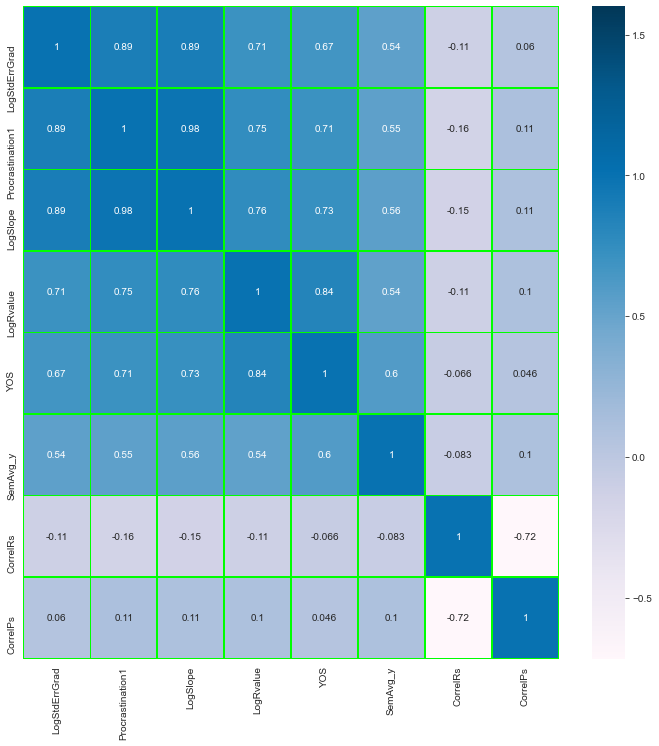

In [194]:
preds_df['Autocorr'] = preds_df_ts.apply(lambda x: x.autocorr(), axis = 1)
all_features = ['LogStdErrGrad', 'Procrastination1', 'LogSlope', 'LogRvalue', 'YOS', 'SemAvg_y', 'CorrelRs', 'CorrelPs']

heater = preds_df[all_features].corr()
fig, ax1 = plt.subplots(figsize = (12,12))

sns.heatmap(heater,linewidths=0.3,vmax=1.6, square=False, cmap = 'PuBu',  linecolor='lime', annot=True, ax = ax1)


In [98]:
preds_df['CorrelPsSig'] = np.where(preds_df['CorrelPs']<0.051, 0, 1)

In [112]:
preds_df['CorrelPsSig'].value_counts()

### Drop nans

In [196]:
preds_df_no_nan = preds_df.dropna()

In [197]:
features = ['LogStdErrGrad', 'Procrastination1', 'LogSlope', 'LogRvalue', 'YOS', 'SemAvg_y', 'LogSum', 'Autocorr']

train_, testEnd = tts(preds_df_no_nan, random_state = 97, test_size = .3, stratify = preds_df_no_nan['CorrelPsSig'])
max_depth = 2
STATE = 97
max_leaf_nodes = 2
train = train_
a = train[train['CorrelPsSig'] == 0]
train = pd.concat([train,a,a], axis = 0) #3 a's is 86a's plus 86+86+86 (so 86x4)

X_train = train[features]
y_train = train[['CorrelPsSig']]

X_testEnd = testEnd[features]
y_testEnd = testEnd[['CorrelPsSig']]

dtclas = DecisionTreeClassifier(max_depth = max_depth, random_state= 97, max_leaf_nodes = max_leaf_nodes) 

y_train_cl, y_test_cl = y_train, y_testEnd
dtclas.fit(X_train, y_train_cl)
y_pred_cl  = dtclas.predict(X_testEnd)
comp_dtclas = pd.DataFrame(data = [y_pred_cl, y_test_cl])
comp_dtclas = comp_dtclas.transpose()
comp_dtclas.columns = ['Predicted', 'Actual']
results = confusion_matrix(y_test_cl, y_pred_cl) # from sklearn.metrics import confusion_matrix


print('Confusion Matrix :')
print(results) 
print(classification_report(y_test_cl,y_pred_cl))
coheezy = cohen_kappa_score(y_test_cl, y_pred_cl)
print(f'Cohen\'s Kappa: {coheezy}')


Confusion Matrix :
[[11  0]
 [33  7]]
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        11
           1       1.00      0.17      0.30        40

    accuracy                           0.35        51
   macro avg       0.62      0.59      0.35        51
weighted avg       0.84      0.35      0.32        51

Cohen's Kappa: 0.0838323353293412


In [144]:
kappa_arr = []
for dep in range(2,20):
    for leaf in range(2,20):
        max_depth = dep
        STATE = 97
        max_leaf_nodes = leaf
        train = train_
        a = train[train['CorrelPsSig'] == 0]
        train = pd.concat([train,a,a,a], axis = 0) #3 a's is 86a's plus 86+86+86 (so 86x4)

        X_train = train[features]
        y_train = train[['CorrelPsSig']]

        X_testEnd = testEnd[features]
        y_testEnd = testEnd[['CorrelPsSig']]

        dtclas = DecisionTreeClassifier(max_depth = max_depth, random_state= 97, max_leaf_nodes = max_leaf_nodes) 

        y_train_cl, y_test_cl = y_train, y_testEnd
        dtclas.fit(X_train, y_train_cl)
        y_pred_cl  = dtclas.predict(X_testEnd)
        comp_dtclas = pd.DataFrame(data = [y_pred_cl, y_test_cl])
        comp_dtclas = comp_dtclas.transpose()
        comp_dtclas.columns = ['Predicted', 'Actual']
        results = confusion_matrix(y_test_cl, y_pred_cl) # from sklearn.metrics import confusion_matrix


        # print('Confusion Matrix :')
        # print(results) 
        # print(classification_report(y_test_cl,y_pred_cl))
        coheezy = cohen_kappa_score(y_test_cl, y_pred_cl)
        kappa_arr.append(coheezy)
print(f'Cohen\'s Kappa: {coheezy}')


Cohen's Kappa: -0.14439024390243915


In [151]:
np.array(kappa_arr).argmax()

0

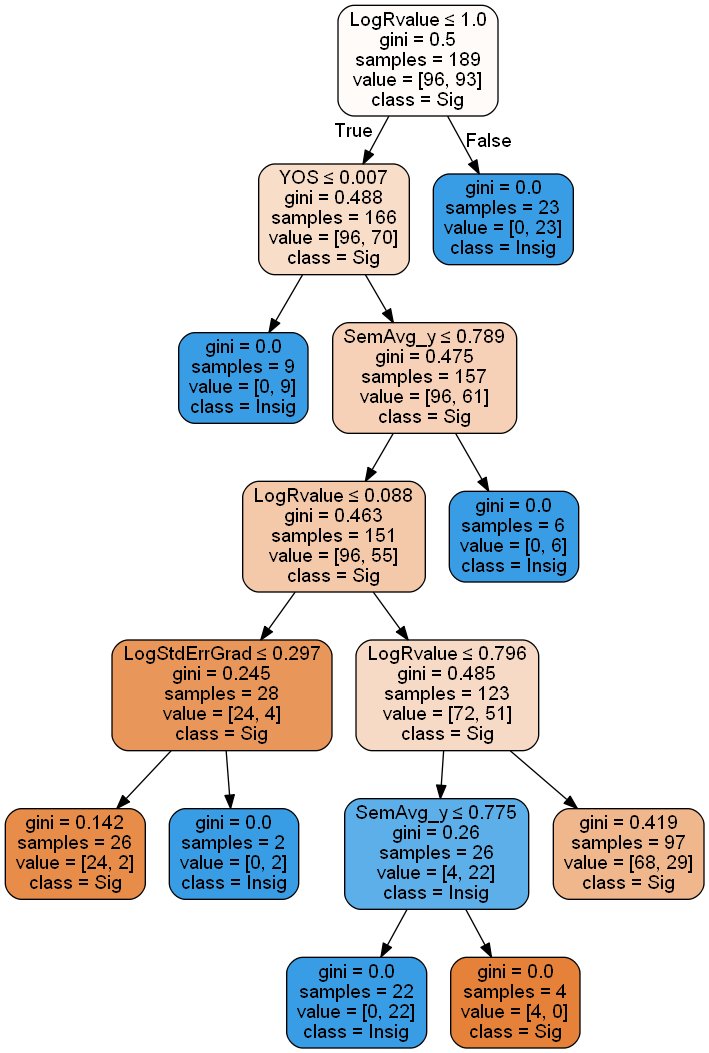

In [122]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()

export_graphviz(dtclas, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features ,class_names=['Sig','Insig'], proportion = False, node_ids = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# if GREAT_DT == 'great':
#     graph.write_png('GREAT_DTREE/X_COMSAPPM123bothbothaa_{}_{}_{}_{}_{}_{}_{}_testsize{}halfway.png'.format(simple, STATE, keep_feats.replace('|',''), max_depth, state, max_leaf_nodes, acc, testsize))
# else:
#     graph.write_png('X_COMSAPPM123bothbothaa_{}_{}_{}_{}_{}_{}_{}_testsize{}halfway.png'.format(simple, STATE, keep_feats.replace('|',''), max_depth, state, max_leaf_nodes, acc, testsize))

# works with 2nd years (not all; we removed those with small or large relative days)
Image(graph.create_png())
# X_train('quantile|peaks|Rvalue|LogStdErrGrad'

In [ ]:
## Plot the prediction changes over time

In [ ]:
# import plotly.offline as py

reverese_col_dict = dict(zip(list(preds_df.iloc[:, 32:38]),[31,32,33,34,35,36])) 

falseSafesPreds = falseSafesPreds.rename(columns = reverese_col_dict)

plot_cols = list(falseSafesPreds.iloc[:, 1:-2])
plot_df = falseSafesPreds[plot_cols].tail(5)
import plotly.graph_objects as go
import plotly.offline as py
traces = []
for s in range(len(plot_df)):
    traces.append(plot_df.iloc[s])# append each of the time series
    traces[s] = go.Scatter(
        x = plot_df.iloc[1].index,
        y = plot_df.iloc[s, :],
        mode = 'lines', 
        name = str(plot_df.index[s]),
        text = str(plot_df.index[s])
                )
    
layout = dict(title = 'Probability of a student being safe agains features',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              yaxis_title="LSTM Prediction (Probability of SAFE)",
              xaxis_title="Feature",
#               showlegend=False,
             )
data = traces
fig = dict(data = data, layout = layout)
py.iplot(fig, filename='Time series')

In [111]:
list(preds_df)

['idnumber',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 'LogStdErrGrad',
 'Procrastination1',
 'LogSlope',
 'LogRvalue',
 'YOS',
 'SemAvg_y',
 'SemesterFiftyOne',
 'LSTMPredictionYOS',
 'ConfusionMatrix',
 'LSTMPrediction21',
 'CorrelRs',
 'CorrelPs',
 'CorrelPsSig']

In [ ]:
testEndResults.describe()

In [ ]:
falseSafesPreds

In [ ]:
testEndResults.describe()

In [ ]:
falseSafes.describe().head(3)

In [ ]:
trueSafes.describe().head(3)

In [ ]:
trueFlags.describe().head(3)

In [ ]:
len(falseSafes)

In [ ]:
# import plotly.offline as py
a = falseSafes.copy()
a = MMS().fit_transform(falseSafes.drop(['idnumber', 'ConfusionMatrix'], axis = 1))
a = pd.DataFrame(a)
reverese_col_dict = dict(zip(list(preds_df.iloc[:, 32:38]),[31,32,33,34,35,36])) 

# a = a.rename(columns = reverese_col_dict)

plot_cols = list(a.iloc[:, 1:-21])
plot_df = a[plot_cols].loc[16:17]
import plotly.graph_objects as go
import plotly.offline as py
traces = []
for s in range(len(plot_df)):
    traces.append(plot_df.iloc[s])# append each of the time series
    traces[s] = go.Scatter(
        x = plot_df.iloc[1].index,
        y = plot_df.iloc[s, :],
        mode = 'lines', 
        name = str(plot_df.index[s]),
        text = str(plot_df.index[s])
                )
    
layout = dict(title = 'Weekly Probability of a Student Seing Safe',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              yaxis_title="LSTM Prediction P(Safe)",
              xaxis_title="Week",
#               ticks=range(len(plot_cols)),
#               showlegend=False,
             )
data = traces
fig = dict(data = data, layout = layout)
py.iplot(fig, filename='Time series')

In [ ]:
a

In [ ]:
# chapt = 'LOGINS'
# gl = Gigaleaf()
# imgName = f'11819ts31LSTM-17Weeks({datetime.datetime.now().strftime("%d-%m_%H-%M")}).png'
# imgPat = fr'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\WRITING\FIGURES\FINAL\ANALYSIS\FORUM\\{chapt}'
# imgLoc = f'{imgPat}\\{imgNamee}'
# plt.savefig(imgLoc)
# gl.link_image(imgLoc, width='\\textwidth')
# gl.sync()
# get_location(imgLoc)

In [ ]:
bio_ = pd.read_csv(r'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\DATA\BI_Data_New\BIOGRAPHICAL\Term_Regn_main.csv', error_bad_lines = False, encoding = "ISO-8859-1")

In [ ]:
bio_lots = pd.read_csv(r'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\DATA\WORKING\bio.csv')
bio_ = bio_lots.copy()

In [ ]:
pd.set_option('display.max_columns', 500)

bio_

In [ ]:
bio = bio_.loc[:,['STUDENT_ENCRYPT_KEY','QUINTILE', 'URBAN_RURAL', 'GENDER_CODE']]

In [ ]:
bio['QUINTILE'] = bio['QUINTILE'].replace({'IQ':6, ' ':7, np.nan: 8}) #Make quintile numeric
bio['QUINTILE'] = pd.to_numeric(bio['QUINTILE'], errors='raise')
bio = bio.rename(columns = {'STUDENT_ENCRYPT_KEY':'idnumber', 'QUINTILE': 'QUANTILE'})

In [ ]:
preds_df_bio = preds_df.merge(bio, how = 'left', on = 'idnumber')

In [ ]:
preds_df_bio

In [ ]:
testEndResults[testEndResults.idnumber == '5c374965dbe5d040ff8e7c681ba5d0b1']white male 1997 born, urban quantile 6.

In [ ]:
falseFlags

In [ ]:
## <span style = 'color:red'> End For report*******************************************************************

In [ ]:
#  <span style = 'color:blue'> LOG DAY OF WEEK </span>

In [ ]:
Is there a relationship between time of day and grades?